Importamos librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import json
from urllib.request import urlopen
import requests

Consultamos la api requerida

In [2]:
link = 'https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=100&page=1'
response = urlopen(link)
data = json.loads(response.read())
coins_market = pd.DataFrame(data)

Exportamos el dataframe de la api a un csv

In [3]:
coins_market.to_csv('coins_market', index=False)

Leemos el csv anteriormente exportado

In [4]:
df = pd.read_csv('coins_market')
df = pd.DataFrame(df)

Visualizacion de las primeras filas

In [5]:
df.head() #cabecera del dataframe

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29393.000000,571933657818,1,6.172519e+11,9.276071e+09,29653.000000,...,2.100000e+07,2.100000e+07,69045.00,-57.40714,2021-11-10T14:24:11.849Z,67.810000,43269.08633,2013-07-06T00:00:00.000Z,NaN,2023-08-15T14:50:32.253Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1841.680000,221375868960,2,2.213759e+11,4.402777e+09,1854.610000,...,1.201422e+08,NaN,4878.26,-62.22612,2021-11-10T14:24:19.604Z,0.432979,425488.51902,2015-10-20T00:00:00.000Z,"{'times': 82.78295465624986, 'currency': 'btc'...",2023-08-15T14:50:26.549Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.998718,83273432830,3,8.327343e+10,9.286358e+09,1.001000,...,8.341087e+10,NaN,1.32,-24.54419,2018-07-24T00:00:00.000Z,0.572521,74.37829,2015-03-02T00:00:00.000Z,NaN,2023-08-15T14:50:02.459Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,239.190000,36800816935,4,4.783795e+10,3.519304e+08,241.000000,...,1.538562e+08,2.000000e+08,686.31,-65.14851,2021-05-10T07:24:17.097Z,0.039818,600608.03754,2017-10-19T00:00:00.000Z,NaN,2023-08-15T14:50:21.265Z
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.626041,33036848598,5,6.258486e+10,8.356534e+08,0.635508,...,9.998852e+10,1.000000e+11,3.40,-81.59456,2018-01-07T00:00:00.000Z,0.002686,23185.61781,2014-05-22T00:00:00.000Z,NaN,2023-08-15T14:50:23.266Z


Ahora procedemos a quedarnos con las 10 monedas que tienen mas potencial en el mercado a mi criterio

Mi eleccion fue a partir de este criterio:

Top 6 monedas historicas del mercado:  
-Bitcoin  
-Ethereum  
-Tether  
-Binancecoin  
-Ripple  
-Litecoin  

Top 4 monedas actuales con mayor potencial a futuro en el mercado:  
-Cardano  
-Solana  
-Avalanche  
-The Sandbox   

Raspamos las API´s de precios historicos de las 10 monedas seleccionadas

Bitcoin:

In [6]:
def obtener_datos_historicos_btc(criptomoneda, moneda_base, dias):
    url = f"https://api.coingecko.com/api/v3/coins/{criptomoneda}/market_chart"
    params = {
        "vs_currency": moneda_base,
        "days": dias,
    }
    response = requests.get(url, params=params)
    data = response.json()

    df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    df_volumen = pd.DataFrame(data['total_volumes'], columns=['timestamp', 'volume'])
    df_volumen['timestamp'] = pd.to_datetime(df_volumen['timestamp'], unit='ms')

    df_cap_mercado = pd.DataFrame(data['market_caps'], columns=['timestamp', 'market_cap'])
    df_cap_mercado['timestamp'] = pd.to_datetime(df_cap_mercado['timestamp'], unit='ms')
    
    df = pd.merge(df, df_volumen, on='timestamp')
    df = pd.merge(df, df_cap_mercado, on='timestamp')
    return df

In [7]:
criptomoneda = 'bitcoin'
moneda_base = 'usd'
dias = 365
btc_df = obtener_datos_historicos_btc(criptomoneda, moneda_base, dias)
btc_df

,timestamp,price,volume,market_cap
0,2022-08-16 00:00:00,24179.014652,3.340481e+10,4.624372e+11
1,2022-08-17 00:00:00,23913.333726,2.497130e+10,4.567910e+11
2,2022-08-18 00:00:00,23359.418837,2.956740e+10,4.470158e+11
3,2022-08-19 00:00:00,23248.384228,2.022821e+10,4.448460e+11
4,2022-08-20 00:00:00,20945.833966,3.514241e+10,4.008104e+11
...,...,...,...,...
361,2023-08-12 00:00:00,29396.847971,4.651950e+09,5.719766e+11
362,2023-08-13 00:00:00,29412.142275,3.994298e+09,5.722578e+11
363,2023-08-14 00:00:00,29284.969714,4.755220e+09,5.696871e+11
364,2023-08-15 00:00:00,29400.586804,1.240836e+10,5.722427e+11


Ethereum:

In [8]:
def obtener_datos_historicos_eth(criptomoneda, moneda_base, dias):
    url = f"https://api.coingecko.com/api/v3/coins/{criptomoneda}/market_chart"
    params = {
        "vs_currency": moneda_base,
        "days": dias,
    }
    response = requests.get(url, params=params)
    data = response.json()

    df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    df_volumen = pd.DataFrame(data['total_volumes'], columns=['timestamp', 'volume'])
    df_volumen['timestamp'] = pd.to_datetime(df_volumen['timestamp'], unit='ms')

    df_cap_mercado = pd.DataFrame(data['market_caps'], columns=['timestamp', 'market_cap'])
    df_cap_mercado['timestamp'] = pd.to_datetime(df_cap_mercado['timestamp'], unit='ms')
    
    df = pd.merge(df, df_volumen, on='timestamp')
    df = pd.merge(df, df_cap_mercado, on='timestamp')
    return df

In [9]:
criptomoneda = 'ethereum'
moneda_base = 'usd'
dias = 365
eth_df = obtener_datos_historicos_eth(criptomoneda, moneda_base, dias)
eth_df

,timestamp,price,volume,market_cap
0,2022-08-16 00:00:00,1908.277642,1.831087e+10,2.294404e+11
1,2022-08-17 00:00:00,1880.600101,1.424023e+10,2.255816e+11
2,2022-08-18 00:00:00,1834.826453,1.842755e+10,2.206659e+11
3,2022-08-19 00:00:00,1850.111291,1.336378e+10,2.226524e+11
4,2022-08-20 00:00:00,1618.532504,2.268736e+10,1.948177e+11
...,...,...,...,...
361,2023-08-12 00:00:00,1847.541835,3.694817e+09,2.220194e+11
362,2023-08-13 00:00:00,1848.505239,2.215987e+09,2.220698e+11
363,2023-08-14 00:00:00,1839.512810,3.642425e+09,2.209483e+11
364,2023-08-15 00:00:00,1843.513391,4.495325e+09,2.215642e+11


Tether:

In [10]:
def obtener_datos_historicos_usdt(criptomoneda, moneda_base, dias):
    url = f"https://api.coingecko.com/api/v3/coins/{criptomoneda}/market_chart"
    params = {
        "vs_currency": moneda_base,
        "days": dias,
    }
    response = requests.get(url, params=params)
    data = response.json()

    df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    df_volumen = pd.DataFrame(data['total_volumes'], columns=['timestamp', 'volume'])
    df_volumen['timestamp'] = pd.to_datetime(df_volumen['timestamp'], unit='ms')

    df_cap_mercado = pd.DataFrame(data['market_caps'], columns=['timestamp', 'market_cap'])
    df_cap_mercado['timestamp'] = pd.to_datetime(df_cap_mercado['timestamp'], unit='ms')
    
    df = pd.merge(df, df_volumen, on='timestamp')
    df = pd.merge(df, df_cap_mercado, on='timestamp')
    return df

In [11]:
criptomoneda = 'tether'
moneda_base = 'usd'
dias = 365
tether_df = obtener_datos_historicos_usdt(criptomoneda, moneda_base, dias)
tether_df

,timestamp,price,volume,market_cap
0,2022-08-16 00:00:00,1.001842,5.762541e+10,6.765299e+10
1,2022-08-17 00:00:00,1.000989,4.820835e+10,6.762839e+10
2,2022-08-18 00:00:00,1.000875,5.435838e+10,6.766131e+10
3,2022-08-19 00:00:00,1.001241,4.209014e+10,6.759940e+10
4,2022-08-20 00:00:00,1.003335,6.330288e+10,6.761379e+10
...,...,...,...,...
361,2023-08-12 00:00:00,0.998938,8.184751e+09,8.331381e+10
362,2023-08-13 00:00:00,0.999377,9.189020e+09,8.335542e+10
363,2023-08-14 00:00:00,0.999384,9.254138e+09,8.330329e+10
364,2023-08-15 00:00:00,0.998713,1.279237e+10,8.332348e+10


Binance Coin:

In [12]:
def obtener_datos_historicos_bnb(criptomoneda, moneda_base, dias):
    url = f"https://api.coingecko.com/api/v3/coins/{criptomoneda}/market_chart"
    params = {
        "vs_currency": moneda_base,
        "days": dias,
    }
    response = requests.get(url, params=params)
    data = response.json()

    df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    df_volumen = pd.DataFrame(data['total_volumes'], columns=['timestamp', 'volume'])
    df_volumen['timestamp'] = pd.to_datetime(df_volumen['timestamp'], unit='ms')

    df_cap_mercado = pd.DataFrame(data['market_caps'], columns=['timestamp', 'market_cap'])
    df_cap_mercado['timestamp'] = pd.to_datetime(df_cap_mercado['timestamp'], unit='ms')
    
    df = pd.merge(df, df_volumen, on='timestamp')
    df = pd.merge(df, df_cap_mercado, on='timestamp')
    return df

In [13]:
criptomoneda = 'binancecoin'
moneda_base = 'usd'
dias = 365
bnb_df = obtener_datos_historicos_bnb(criptomoneda, moneda_base, dias)
bnb_df

,timestamp,price,volume,market_cap
0,2022-08-16 00:00:00,319.974835,1.029621e+09,5.225906e+10
1,2022-08-17 00:00:00,316.698400,1.009809e+09,5.164471e+10
2,2022-08-18 00:00:00,306.639287,1.199734e+09,5.010061e+10
3,2022-08-19 00:00:00,298.600700,1.091856e+09,4.882570e+10
4,2022-08-20 00:00:00,279.977814,1.657993e+09,4.564295e+10
...,...,...,...,...
361,2023-08-12 00:00:00,239.595822,3.637634e+08,3.686481e+10
362,2023-08-13 00:00:00,240.088445,1.952054e+08,3.694355e+10
363,2023-08-14 00:00:00,240.030792,2.307638e+08,3.691382e+10
364,2023-08-15 00:00:00,240.358056,3.232128e+08,3.697023e+10


Ripple:

In [14]:
def obtener_datos_historicos_xrp(criptomoneda, moneda_base, dias):
    url = f"https://api.coingecko.com/api/v3/coins/{criptomoneda}/market_chart"
    params = {
        "vs_currency": moneda_base,
        "days": dias,
    }
    response = requests.get(url, params=params)
    data = response.json()

    df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    df_volumen = pd.DataFrame(data['total_volumes'], columns=['timestamp', 'volume'])
    df_volumen['timestamp'] = pd.to_datetime(df_volumen['timestamp'], unit='ms')

    df_cap_mercado = pd.DataFrame(data['market_caps'], columns=['timestamp', 'market_cap'])
    df_cap_mercado['timestamp'] = pd.to_datetime(df_cap_mercado['timestamp'], unit='ms')
    
    df = pd.merge(df, df_volumen, on='timestamp')
    df = pd.merge(df, df_cap_mercado, on='timestamp')
    return df

In [15]:
criptomoneda = 'ripple'
moneda_base = 'usd'
dias = 365
xrp_df = obtener_datos_historicos_xrp(criptomoneda, moneda_base, dias)
xrp_df

,timestamp,price,volume,market_cap
0,2022-08-16 00:00:00,0.376851,1.162194e+09,1.852596e+10
1,2022-08-17 00:00:00,0.378322,1.031739e+09,1.866240e+10
2,2022-08-18 00:00:00,0.381900,1.563237e+09,1.888587e+10
3,2022-08-19 00:00:00,0.372371,9.883503e+08,1.841232e+10
4,2022-08-20 00:00:00,0.336473,1.723040e+09,1.661984e+10
...,...,...,...,...
361,2023-08-12 00:00:00,0.631618,9.249709e+08,3.334065e+10
362,2023-08-13 00:00:00,0.627081,5.029214e+08,3.309347e+10
363,2023-08-14 00:00:00,0.625689,6.209399e+08,3.302093e+10
364,2023-08-15 00:00:00,0.634681,9.673053e+08,3.352678e+10


Cardano:

In [16]:
def obtener_datos_historicos_ada(criptomoneda, moneda_base, dias):
    url = f"https://api.coingecko.com/api/v3/coins/{criptomoneda}/market_chart"
    params = {
        "vs_currency": moneda_base,
        "days": dias,
    }
    response = requests.get(url, params=params)
    data = response.json()

    df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    df_volumen = pd.DataFrame(data['total_volumes'], columns=['timestamp', 'volume'])
    df_volumen['timestamp'] = pd.to_datetime(df_volumen['timestamp'], unit='ms')

    df_cap_mercado = pd.DataFrame(data['market_caps'], columns=['timestamp', 'market_cap'])
    df_cap_mercado['timestamp'] = pd.to_datetime(df_cap_mercado['timestamp'], unit='ms')
    
    df = pd.merge(df, df_volumen, on='timestamp')
    df = pd.merge(df, df_cap_mercado, on='timestamp')
    return df

In [17]:
criptomoneda = 'cardano'
moneda_base = 'usd'
dias = 365
ada_df = obtener_datos_historicos_ada(criptomoneda, moneda_base, dias)
ada_df

,timestamp,price,volume,market_cap
0,2022-08-16 00:00:00,0.552459,8.236799e+08,1.869741e+10
1,2022-08-17 00:00:00,0.559785,6.807133e+08,1.892784e+10
2,2022-08-18 00:00:00,0.539302,9.965319e+08,1.821255e+10
3,2022-08-19 00:00:00,0.514487,5.741756e+08,1.741240e+10
4,2022-08-20 00:00:00,0.452547,1.131870e+09,1.526462e+10
...,...,...,...,...
361,2023-08-12 00:00:00,0.293325,1.246106e+08,1.027866e+10
362,2023-08-13 00:00:00,0.291666,1.056080e+08,1.021759e+10
363,2023-08-14 00:00:00,0.289372,1.251063e+08,1.013505e+10
364,2023-08-15 00:00:00,0.290452,1.298745e+08,1.018196e+10


Solana:

In [18]:
def obtener_datos_historicos_sol(criptomoneda, moneda_base, dias):
    url = f"https://api.coingecko.com/api/v3/coins/{criptomoneda}/market_chart"
    params = {
        "vs_currency": moneda_base,
        "days": dias,
    }
    response = requests.get(url, params=params)
    data = response.json()

    df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    df_volumen = pd.DataFrame(data['total_volumes'], columns=['timestamp', 'volume'])
    df_volumen['timestamp'] = pd.to_datetime(df_volumen['timestamp'], unit='ms')

    df_cap_mercado = pd.DataFrame(data['market_caps'], columns=['timestamp', 'market_cap'])
    df_cap_mercado['timestamp'] = pd.to_datetime(df_cap_mercado['timestamp'], unit='ms')
    
    df = pd.merge(df, df_volumen, on='timestamp')
    df = pd.merge(df, df_cap_mercado, on='timestamp')
    return df

In [19]:
criptomoneda = 'solana'
moneda_base = 'usd'
dias = 365
sol_df = obtener_datos_historicos_sol(criptomoneda, moneda_base, dias)
sol_df

,timestamp,price,volume,market_cap
0,2022-08-16 00:00:00,43.902581,1.018587e+09,1.532266e+10
1,2022-08-17 00:00:00,43.252084,1.075538e+09,1.506556e+10
2,2022-08-18 00:00:00,40.556286,1.249878e+09,1.416116e+10
3,2022-08-19 00:00:00,39.618895,8.249718e+08,1.386326e+10
4,2022-08-20 00:00:00,35.989795,1.786764e+09,1.253047e+10
...,...,...,...,...
361,2023-08-12 00:00:00,24.579810,3.378071e+08,9.969764e+09
362,2023-08-13 00:00:00,24.891819,2.773069e+08,1.009565e+10
363,2023-08-14 00:00:00,24.223294,2.781821e+08,9.839555e+09
364,2023-08-15 00:00:00,25.147725,3.880259e+08,1.021132e+10


Litecoin:

In [20]:
def obtener_datos_historicos_ltc(criptomoneda, moneda_base, dias):
    url = f"https://api.coingecko.com/api/v3/coins/{criptomoneda}/market_chart"
    params = {
        "vs_currency": moneda_base,
        "days": dias,
    }
    response = requests.get(url, params=params)
    data = response.json()

    df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    df_volumen = pd.DataFrame(data['total_volumes'], columns=['timestamp', 'volume'])
    df_volumen['timestamp'] = pd.to_datetime(df_volumen['timestamp'], unit='ms')

    df_cap_mercado = pd.DataFrame(data['market_caps'], columns=['timestamp', 'market_cap'])
    df_cap_mercado['timestamp'] = pd.to_datetime(df_cap_mercado['timestamp'], unit='ms')
    
    df = pd.merge(df, df_volumen, on='timestamp')
    df = pd.merge(df, df_cap_mercado, on='timestamp')
    return df

In [21]:
criptomoneda = 'litecoin'
moneda_base = 'usd'
dias = 365
ltc_df = obtener_datos_historicos_ltc(criptomoneda, moneda_base, dias)
ltc_df

,timestamp,price,volume,market_cap
0,2022-08-16 00:00:00,60.891103,4.466906e+08,4.321662e+09
1,2022-08-17 00:00:00,61.394904,3.573562e+08,4.356538e+09
2,2022-08-18 00:00:00,60.423145,5.277282e+08,4.291324e+09
3,2022-08-19 00:00:00,60.084630,3.541123e+08,4.272018e+09
4,2022-08-20 00:00:00,54.052991,5.481368e+08,3.830404e+09
...,...,...,...,...
361,2023-08-12 00:00:00,83.508009,2.434472e+08,6.138731e+09
362,2023-08-13 00:00:00,83.399575,2.149953e+08,6.132642e+09
363,2023-08-14 00:00:00,81.946229,4.041983e+08,6.026113e+09
364,2023-08-15 00:00:00,82.043497,3.161944e+08,6.034074e+09


Avalanche:

In [22]:
def obtener_datos_historicos_avax(criptomoneda, moneda_base, dias):
    url = f"https://api.coingecko.com/api/v3/coins/{criptomoneda}/market_chart"
    params = {
        "vs_currency": moneda_base,
        "days": dias,
    }
    response = requests.get(url, params=params)
    data = response.json()

    df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    df_volumen = pd.DataFrame(data['total_volumes'], columns=['timestamp', 'volume'])
    df_volumen['timestamp'] = pd.to_datetime(df_volumen['timestamp'], unit='ms')

    df_cap_mercado = pd.DataFrame(data['market_caps'], columns=['timestamp', 'market_cap'])
    df_cap_mercado['timestamp'] = pd.to_datetime(df_cap_mercado['timestamp'], unit='ms')
    
    df = pd.merge(df, df_volumen, on='timestamp')
    df = pd.merge(df, df_cap_mercado, on='timestamp')
    return df

In [23]:
criptomoneda = 'avalanche-2'
moneda_base = 'usd'
dias = 365
avax_df = obtener_datos_historicos_avax(criptomoneda, moneda_base, dias)
avax_df

,timestamp,price,volume,market_cap
0,2022-08-16 00:00:00,27.878861,4.390438e+08,7.904216e+09
1,2022-08-17 00:00:00,27.251164,3.659226e+08,7.763571e+09
2,2022-08-18 00:00:00,25.530010,4.260619e+08,7.283666e+09
3,2022-08-19 00:00:00,24.299012,3.173880e+08,6.932924e+09
4,2022-08-20 00:00:00,22.535468,6.394015e+08,6.421005e+09
...,...,...,...,...
361,2023-08-12 00:00:00,12.440173,8.876140e+07,4.276792e+09
362,2023-08-13 00:00:00,12.385306,7.267346e+07,4.258060e+09
363,2023-08-14 00:00:00,12.259066,9.197683e+07,4.213158e+09
364,2023-08-15 00:00:00,12.352482,1.060219e+08,4.247382e+09


The SandBox:

In [24]:
def obtener_datos_historicos_sand(criptomoneda, moneda_base, dias):
    url = f"https://api.coingecko.com/api/v3/coins/{criptomoneda}/market_chart"
    params = {
        "vs_currency": moneda_base,
        "days": dias,
    }
    response = requests.get(url, params=params)
    data = response.json()

    df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    df_volumen = pd.DataFrame(data['total_volumes'], columns=['timestamp', 'volume'])
    df_volumen['timestamp'] = pd.to_datetime(df_volumen['timestamp'], unit='ms')

    df_cap_mercado = pd.DataFrame(data['market_caps'], columns=['timestamp', 'market_cap'])
    df_cap_mercado['timestamp'] = pd.to_datetime(df_cap_mercado['timestamp'], unit='ms')
    
    df = pd.merge(df, df_volumen, on='timestamp')
    df = pd.merge(df, df_cap_mercado, on='timestamp')
    return df

In [25]:
criptomoneda = 'the-sandbox'
moneda_base = 'usd'
dias = 365
sand_df = obtener_datos_historicos_sand(criptomoneda, moneda_base, dias)
sand_df

,timestamp,price,volume,market_cap
0,2022-08-16 00:00:00,1.318184,4.641072e+08,1.833054e+09
1,2022-08-17 00:00:00,1.282005,3.193480e+08,1.790321e+09
2,2022-08-18 00:00:00,1.222398,3.434674e+08,1.711922e+09
3,2022-08-19 00:00:00,1.160638,2.918453e+08,1.659775e+09
4,2022-08-20 00:00:00,1.053258,4.050879e+08,1.502691e+09
...,...,...,...,...
361,2023-08-12 00:00:00,0.400066,7.967863e+07,8.234110e+08
362,2023-08-13 00:00:00,0.401740,5.993890e+07,8.264524e+08
363,2023-08-14 00:00:00,0.392973,7.751237e+07,8.080138e+08
364,2023-08-15 00:00:00,0.392645,1.059239e+08,8.079203e+08


Visualizacion de valores faltantes

Bitcoin

In [26]:
missing_count = btc_df.isna().sum()
print(missing_count)

timestamp     0
price         0
volume        0
market_cap    0
dtype: int64


Ethereum

In [27]:
missing_count = eth_df.isna().sum()
print(missing_count)

timestamp     0
price         0
volume        0
market_cap    0
dtype: int64


Binance coin

In [28]:
missing_count = bnb_df.isna().sum()
print(missing_count)

timestamp     0
price         0
volume        0
market_cap    0
dtype: int64


Tether

In [29]:
missing_count = tether_df.isna().sum()
print(missing_count)

timestamp     0
price         0
volume        0
market_cap    0
dtype: int64


Ripple

In [30]:
missing_count = xrp_df.isna().sum()
print(missing_count)

timestamp     0
price         0
volume        0
market_cap    0
dtype: int64


Litecoin

In [31]:
missing_count = ltc_df.isna().sum()
print(missing_count)

timestamp     0
price         0
volume        0
market_cap    0
dtype: int64


Cardano

In [32]:
missing_count = ada_df.isna().sum()
print(missing_count)

timestamp     0
price         0
volume        0
market_cap    0
dtype: int64


Solana

In [33]:
missing_count = sol_df.isna().sum()
print(missing_count)

timestamp     0
price         0
volume        0
market_cap    0
dtype: int64


Avalanche

In [34]:
missing_count = avax_df.isna().sum()
print(missing_count)

timestamp     0
price         0
volume        0
market_cap    0
dtype: int64


The Sandbox

In [35]:
missing_count = sand_df.isna().sum()
print(missing_count)

timestamp     0
price         0
volume        0
market_cap    0
dtype: int64


Como veran la cantidad de valores faltantes es nula por lo cual no es necesario realizar acciona alguna sobre los df´s.

Estadisticas descriptivas

In [36]:
btc_stats = btc_df[['price', 'volume', 'market_cap']].describe()
eth_stats = eth_df[['price', 'volume', 'market_cap']].describe()
bnb_stats = bnb_df[['price', 'volume', 'market_cap']].describe()
tether_stats = tether_df[['price', 'volume', 'market_cap']].describe()
xrp_stats = xrp_df[['price', 'volume', 'market_cap']].describe()
ltc_stats = ltc_df[['price', 'volume', 'market_cap']].describe()
ada_stats = ada_df[['price', 'volume', 'market_cap']].describe()
sol_stats = sol_df[['price', 'volume', 'market_cap']].describe()
avax_stats = avax_df[['price', 'volume', 'market_cap']].describe()
sand_stats = sand_df[['price', 'volume', 'market_cap']].describe()
# Repite este proceso para cada criptomoneda

In [37]:
summary_df = pd.DataFrame(index=['BTC', 'ETH', 'BNB', 'TETHER','XRP', 'LTC','ADA','SOL','AVAX','SAND'])  # Define las criptomonedas como índices

# Añade las estadísticas como columnas al DataFrame de resumen
summary_df['Precio Media'] = [btc_stats.loc['mean', 'price'], eth_stats.loc['mean', 'price'], bnb_stats.loc['mean', 'price'],tether_stats.loc['mean', 'price'],xrp_stats.loc['mean', 'price'],ltc_stats.loc['mean', 'price'],ada_stats.loc['mean', 'price'],sol_stats.loc['mean', 'price'],avax_stats.loc['mean', 'price'],sand_stats.loc['mean', 'price']]
summary_df['Precio Mediana'] = [btc_stats.loc['50%', 'price'], eth_stats.loc['50%', 'price'], bnb_stats.loc['50%', 'price'], tether_stats.loc['50%', 'price'],xrp_stats.loc['50%', 'price'],ltc_stats.loc['50%', 'price'],ada_stats.loc['50%', 'price'],sol_stats.loc['50%', 'price'],avax_stats.loc['50%', 'price'],sand_stats.loc['50%', 'price']]
summary_df['Volumen Media'] = [btc_stats.loc['mean', 'volume'], eth_stats.loc['mean', 'volume'], bnb_stats.loc['mean', 'volume'], tether_stats.loc['mean', 'volume'],xrp_stats.loc['mean', 'volume'],ltc_stats.loc['mean', 'volume'],ada_stats.loc['mean', 'volume'],sol_stats.loc['mean', 'volume'],avax_stats.loc['mean', 'volume'],sand_stats.loc['mean', 'volume']]
summary_df['Volumen Mediana'] = [btc_stats.loc['50%', 'volume'], eth_stats.loc['50%', 'volume'], bnb_stats.loc['50%', 'volume'], tether_stats.loc['50%', 'volume'],xrp_stats.loc['50%', 'volume'],ltc_stats.loc['50%', 'volume'],ada_stats.loc['50%', 'volume'],sol_stats.loc['50%', 'volume'],avax_stats.loc['50%', 'volume'],sand_stats.loc['50%', 'volume']]
summary_df['Market Cap Media'] = [btc_stats.loc['mean', 'market_cap'], eth_stats.loc['mean', 'market_cap'], bnb_stats.loc['mean', 'market_cap'], tether_stats.loc['mean', 'market_cap'],xrp_stats.loc['mean', 'market_cap'],ltc_stats.loc['mean', 'market_cap'],ada_stats.loc['mean', 'market_cap'],sol_stats.loc['mean', 'market_cap'],avax_stats.loc['mean', 'market_cap'],sand_stats.loc['mean', 'market_cap']]
summary_df['Market Cap Mediana'] = [btc_stats.loc['50%', 'market_cap'], eth_stats.loc['50%', 'market_cap'], bnb_stats.loc['50%', 'market_cap'], tether_stats.loc['50%', 'market_cap'],xrp_stats.loc['50%', 'market_cap'],ltc_stats.loc['50%', 'market_cap'],ada_stats.loc['50%', 'market_cap'],sol_stats.loc['50%', 'market_cap'],avax_stats.loc['50%', 'market_cap'],sand_stats.loc['50%', 'market_cap']]
# Agrega más columnas de estadísticas según sea necesario

In [38]:
summary_df

,Precio Media,Precio Mediana,Volumen Media,Volumen Mediana,Market Cap Media,Market Cap Mediana
BTC,23509.518183,23146.433650,2.375523e+10,2.111126e+10,4.538809e+11,4.454447e+11
ETH,1614.555115,1646.329746,1.015378e+10,8.701921e+09,1.943745e+11,1.983549e+11
BNB,286.001454,288.022462,7.064391e+08,5.920943e+08,4.528949e+10,4.561697e+10
TETHER,1.000581,1.000382,3.294653e+10,2.955888e+10,7.388296e+10,6.951239e+10
XRP,0.451179,0.447903,1.371533e+09,1.157525e+09,2.308322e+10,2.249201e+10
LTC,78.483001,82.921665,6.438216e+08,5.286763e+08,5.681388e+09,6.053250e+09
ADA,0.360264,0.362825,3.750930e+08,3.224518e+08,1.252338e+10,1.267290e+10
SOL,22.759093,21.992167,6.960228e+08,5.304047e+08,8.548797e+09,8.551574e+09
AVAX,15.898163,15.947539,2.364276e+08,1.756143e+08,5.036257e+09,4.999888e+09
SAND,0.637522,0.602419,1.664884e+08,1.318137e+08,1.062774e+09,1.073900e+09


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

Visualizaciones comparativas

Grafico de barras

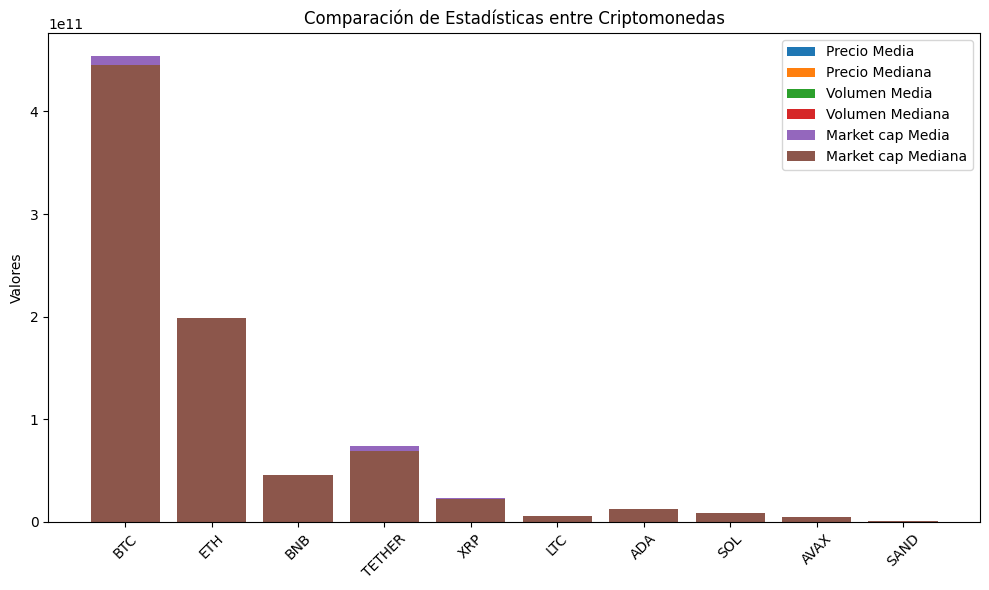

In [40]:
# Define las criptomonedas y las estadísticas para el eje x y los valores de las barras
cryptos = ['BTC', 'ETH', 'BNB', 'TETHER','XRP', 'LTC','ADA','SOL','AVAX','SAND']  # Lista de criptomonedas
stats = ['Precio Media', 'Precio Mediana', 'Volumen Media', 'Volumen Mediana', 'Market cap Media', 'Market cap Mediana']  # Lista de estadísticas

# Datos de las estadísticas (ejemplo)
data = [
    [btc_stats.loc['mean', 'price'], eth_stats.loc['mean', 'price'], bnb_stats.loc['mean', 'price'], tether_stats.loc['mean', 'price'],xrp_stats.loc['mean', 'price'],ltc_stats.loc['mean', 'price'],ada_stats.loc['mean', 'price'],sol_stats.loc['mean', 'price'],avax_stats.loc['mean', 'price'],sand_stats.loc['mean', 'price']],
    [btc_stats.loc['50%', 'price'], eth_stats.loc['50%', 'price'], bnb_stats.loc['50%', 'price'],tether_stats.loc['50%', 'price'],xrp_stats.loc['50%', 'price'],ltc_stats.loc['50%', 'price'],ada_stats.loc['50%', 'price'],sol_stats.loc['50%', 'price'],avax_stats.loc['50%', 'price'],sand_stats.loc['50%', 'price']],
    [btc_stats.loc['mean', 'volume'], eth_stats.loc['mean', 'volume'], bnb_stats.loc['mean', 'volume'], tether_stats.loc['mean', 'volume'],xrp_stats.loc['mean', 'volume'],ltc_stats.loc['mean', 'volume'],ada_stats.loc['mean', 'volume'],sol_stats.loc['mean', 'volume'],avax_stats.loc['mean', 'volume'],sand_stats.loc['mean', 'volume']],
    [btc_stats.loc['50%', 'volume'], eth_stats.loc['50%', 'volume'], bnb_stats.loc['50%', 'volume'], tether_stats.loc['50%', 'volume'],xrp_stats.loc['50%', 'volume'],ltc_stats.loc['50%', 'volume'],ada_stats.loc['50%', 'volume'],sol_stats.loc['50%', 'volume'],avax_stats.loc['50%', 'volume'],sand_stats.loc['50%', 'volume']],
    [btc_stats.loc['mean', 'market_cap'], eth_stats.loc['mean', 'market_cap'], bnb_stats.loc['mean', 'market_cap'], tether_stats.loc['mean', 'market_cap'],xrp_stats.loc['mean', 'market_cap'],ltc_stats.loc['mean', 'market_cap'],ada_stats.loc['mean', 'market_cap'],sol_stats.loc['mean', 'market_cap'],avax_stats.loc['mean', 'market_cap'],sand_stats.loc['mean', 'market_cap']],
    [btc_stats.loc['50%', 'market_cap'], eth_stats.loc['50%', 'market_cap'], bnb_stats.loc['50%', 'market_cap'], tether_stats.loc['50%', 'market_cap'],xrp_stats.loc['50%', 'market_cap'],ltc_stats.loc['50%', 'market_cap'],ada_stats.loc['50%', 'market_cap'],sol_stats.loc['50%', 'market_cap'],avax_stats.loc['50%', 'market_cap'],sand_stats.loc['50%', 'market_cap']]
]

# Crear un gráfico de barras o columnas
fig, ax = plt.subplots(figsize=(10, 6))
for i, stat in enumerate(stats):
    ax.bar(cryptos, data[i], label=stat)

ax.set_ylabel('Valores')
ax.set_title('Comparación de Estadísticas entre Criptomonedas')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este grafico se concluye que la medida comparativa con mas peso es la estadistica de capitalizacion de mercado mediana mientras que las demas no llegan a obtener un porcentaje significativo en la comparacion de este grafico de estadisticas. Tanto precio media y mediana como volumen media y mediana obtienen valores muy diminutos en comparacion con los de capitalizacion del mercado.  
Por lo cual, la mediana de capitalizacion de mercado en si se puede considerar como una variable con valores atipicos.

Graficos para entender distribuciones

Bitcoin

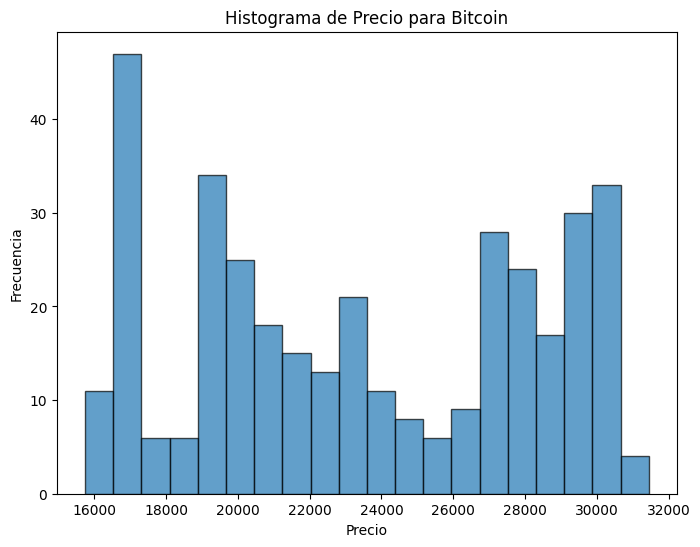

C:\Users\carlo\AppData\Local\Temp\ipykernel_16724\2149537388.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(btc_df['volume'], shade=True)


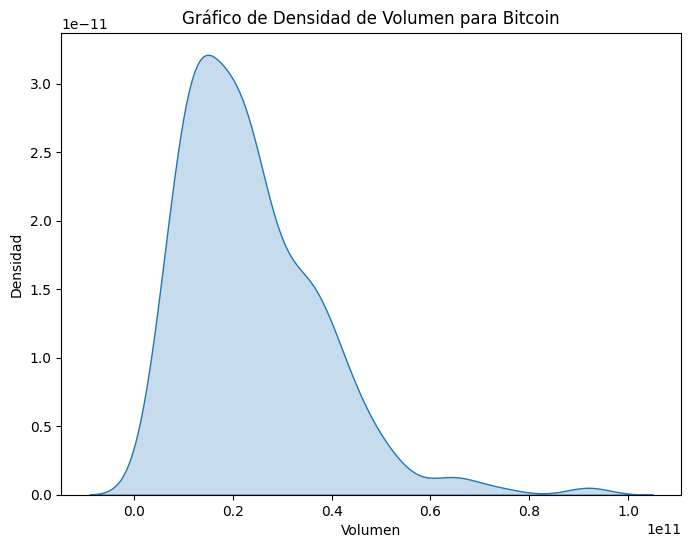

In [101]:
# Crear histograma de precios para Bitcoin
plt.figure(figsize=(8, 6))
plt.hist(btc_df['price'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precio para Bitcoin')
plt.show()

# Crear gráfico de densidad de volúmenes para Bitcoin
plt.figure(figsize=(8, 6))
sns.kdeplot(btc_df['volume'], shade=True)
plt.xlabel('Volumen')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Volumen para Bitcoin')
plt.show()

Para bitcoin en el histograma de precios se ve como la media de los precios se mantienen alrededor de los 23 mil dolares y el valor con mas frecuencia se encuentra en el rango de los 19 mil dolares.  

En cuanto al grafico de densidad del volumen de bitcoin se ve un claro sesgo positivo hacia la derecha lo cual indica que hay un volumen de transacciones significativo en los valores más altos. Esto podría sugerir una actividad comercial intensa cuando los precios suben o cuando se producen movimientos bruscos en el mercado

Ethereum

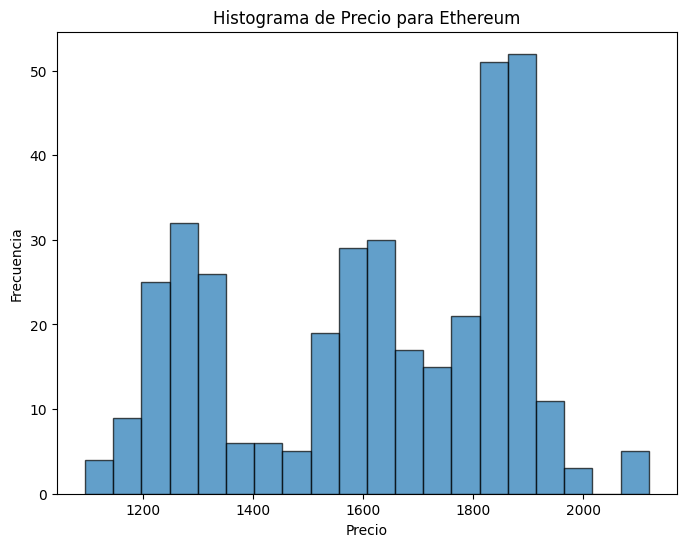

C:\Users\carlo\AppData\Local\Temp\ipykernel_16724\1998312072.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(eth_df['volume'], shade=True)


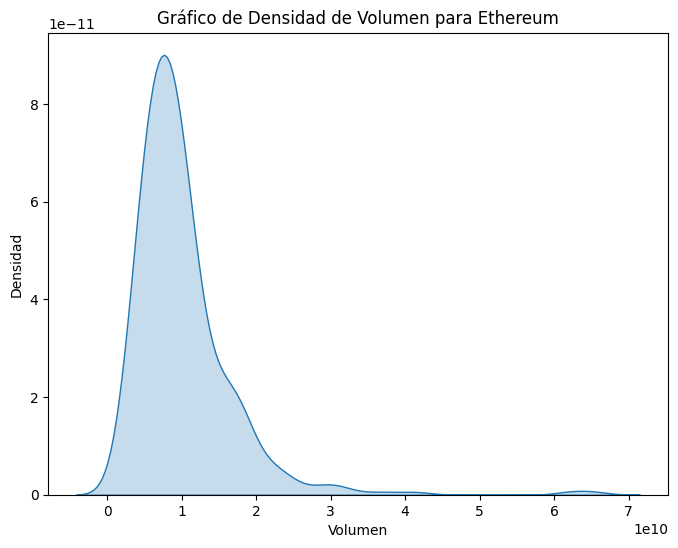

In [102]:
# Crear histograma de precios para Ethereum
plt.figure(figsize=(8, 6))
plt.hist(eth_df['price'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precio para Ethereum')
plt.show()

# Crear gráfico de densidad de volúmenes para Ethereum
plt.figure(figsize=(8, 6))
sns.kdeplot(eth_df['volume'], shade=True)
plt.xlabel('Volumen')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Volumen para Ethereum')
plt.show()

En el histograma de precios de ethereum, el precio en promedio se encuentra alrededor de los 1600 dolares, mientras que los precios que mas se suelen repetir frecuentan entre los 1810 y 1900 dolares.  

En cuanto a la densidad del volumen de ethereum vemos que sucede algo parecido que con bitcoin, solo que en este caso al ser mas angosto el grafico, podría indicar que la mayoría de las transacciones se están concentrando en rangos de precios más estrechos. Esto podría sugerir una cierta estabilidad en el precio y un consenso en torno a esos valores específicos.

Binance Coin

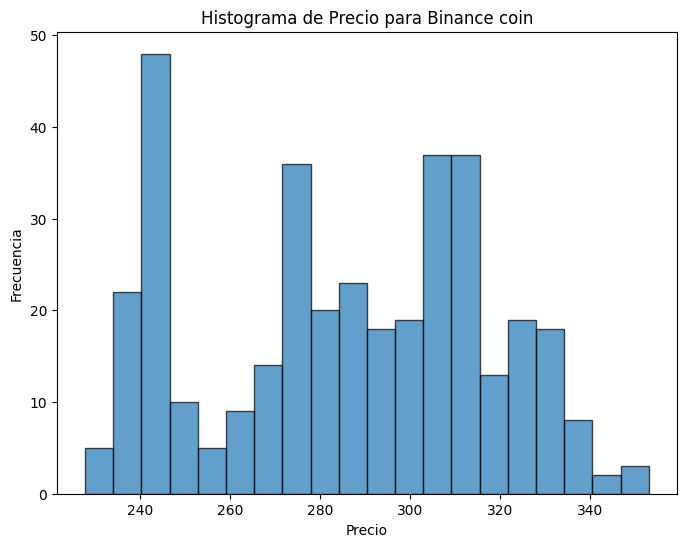

C:\Users\carlo\AppData\Local\Temp\ipykernel_16724\2596282997.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(bnb_df['volume'], shade=True)


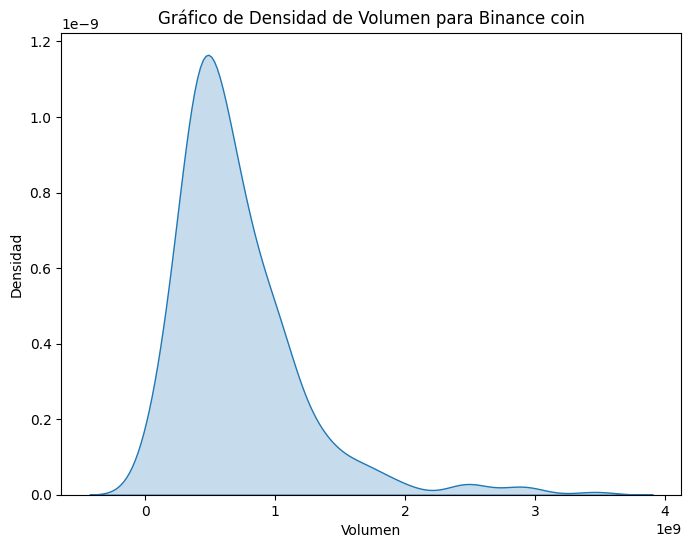

In [103]:
# Crear histograma de precios para Binance coin
plt.figure(figsize=(8, 6))
plt.hist(bnb_df['price'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precio para Binance coin')
plt.show()

# Crear gráfico de densidad de volúmenes para Binance coin
plt.figure(figsize=(8, 6))
sns.kdeplot(bnb_df['volume'], shade=True)
plt.xlabel('Volumen')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Volumen para Binance coin')
plt.show()

En el caso de binance coin la media de precios se encuentra alrededor de los 280 dolares, donde los precios mas frecuentes oscilan entre los 240 y 245 dolares.

En el grafico de densidad del volumen ocurre lo mismo que con ethereum, la mayoría de las transacciones se están concentrando en rangos de precios más estrechos. Esto podría sugerir una cierta estabilidad en el precio y un consenso en torno a esos valores específicos.

Tether

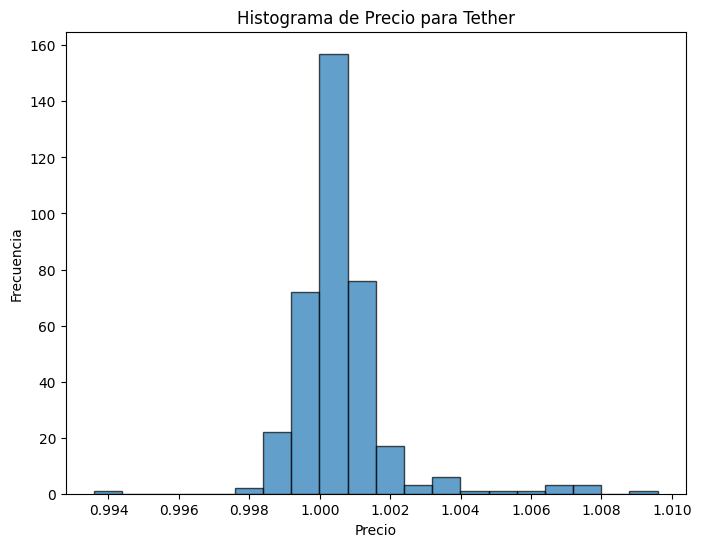

C:\Users\carlo\AppData\Local\Temp\ipykernel_16724\1661919042.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tether_df['volume'], shade=True)


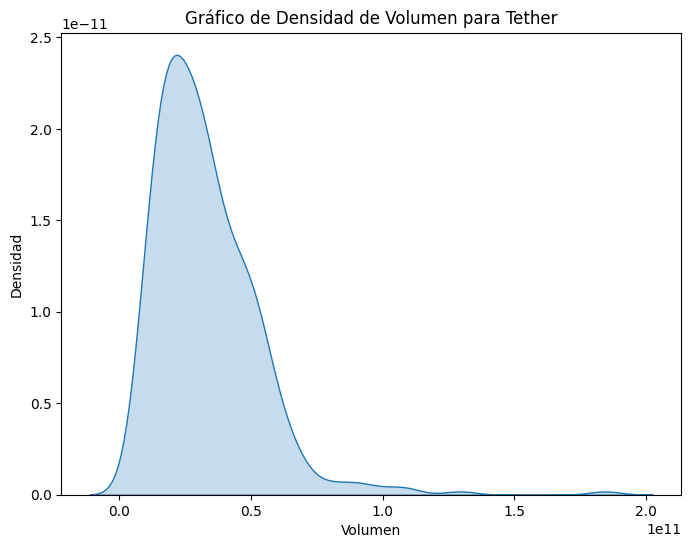

In [104]:
# Crear histograma de precios para Tether
plt.figure(figsize=(8, 6))
plt.hist(tether_df['price'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precio para Tether')
plt.show()

# Crear gráfico de densidad de volúmenes para Tether
plt.figure(figsize=(8, 6))
sns.kdeplot(tether_df['volume'], shade=True)
plt.xlabel('Volumen')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Volumen para Tether')
plt.show()

Para tether la distribucion de precios es mas pareja, la media de los mismos estan en 1 dolar.

Y en el grafico de densidad de volumen se repite lo mismo que con las 2 anteriores monedas, la mayoría de las transacciones se están concentrando en rangos de precios más estrechos. Esto podría sugerir una cierta estabilidad en el precio y un consenso en torno a esos valores específicos.

Ripple

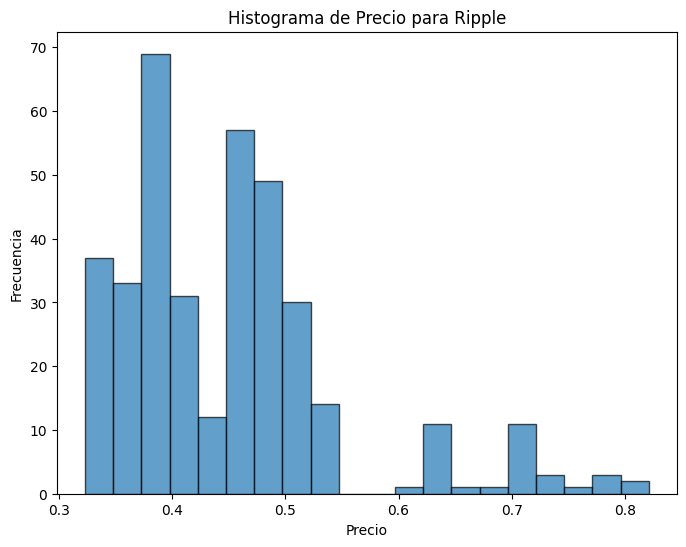

C:\Users\carlo\AppData\Local\Temp\ipykernel_16724\2348602033.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(xrp_df['volume'], shade=True)


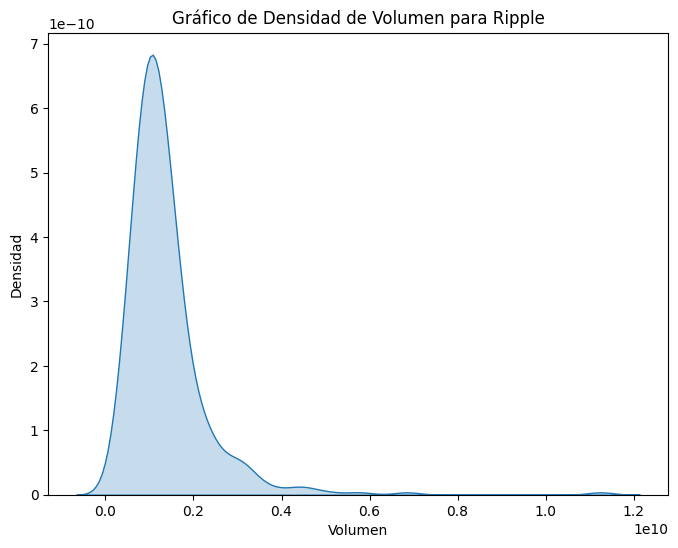

In [105]:
# Crear histograma de precios para Ripple
plt.figure(figsize=(8, 6))
plt.hist(xrp_df['price'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precio para Ripple')
plt.show()

# Crear gráfico de densidad de volúmenes para Ripple
plt.figure(figsize=(8, 6))
sns.kdeplot(xrp_df['volume'], shade=True)
plt.xlabel('Volumen')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Volumen para Ripple')
plt.show()

Para Ripple el precio mas frecuentado es de poco menos de 0.4 centavos de dolar y la media esta en 0.45 centavos de dolar.

En este caso vemos un grafico mas angosto, un gráfico de densidad de volumen extremadamente angosto podría indicar que ha habido muy poca actividad de negociación en la criptomoneda. Esto podría deberse a una falta de interés o liquidez en el mercado para esa moneda en particular.

Litecoin

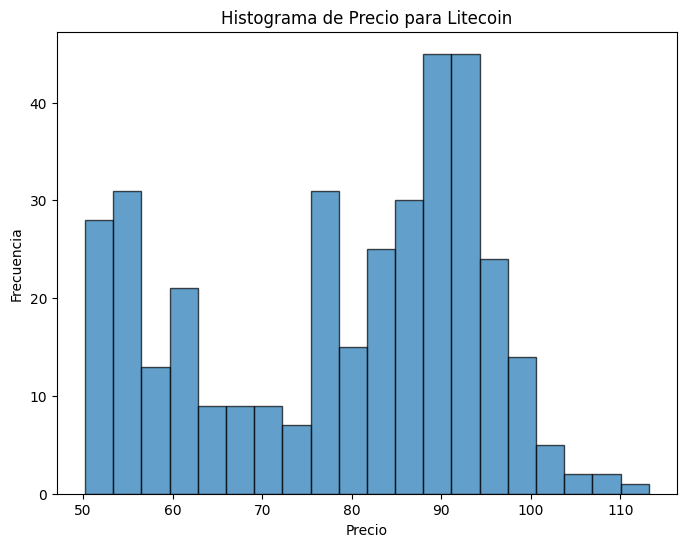

C:\Users\carlo\AppData\Local\Temp\ipykernel_16724\2858504781.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ltc_df['volume'], shade=True)


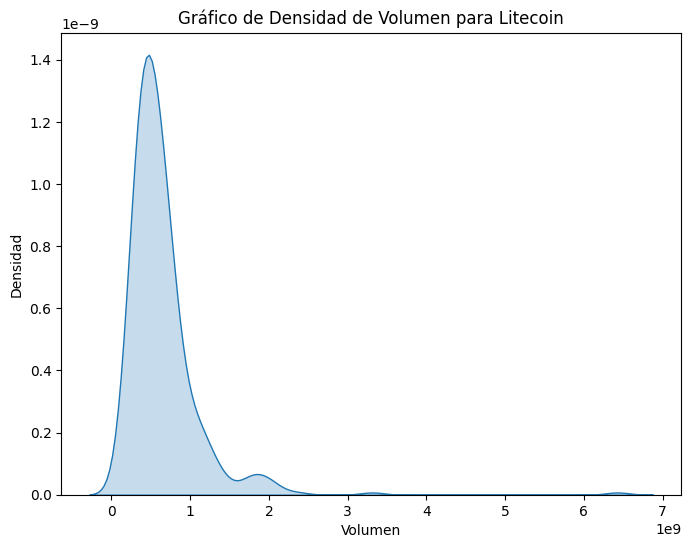

In [106]:
# Crear histograma de precios para Litecoin
plt.figure(figsize=(8, 6))
plt.hist(ltc_df['price'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precio para Litecoin')
plt.show()

# Crear gráfico de densidad de volúmenes para Litecoin
plt.figure(figsize=(8, 6))
sns.kdeplot(ltc_df['volume'], shade=True)
plt.xlabel('Volumen')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Volumen para Litecoin')
plt.show()

La media de litecoin de precios esta en 78 dolares y los precios mas frecuentados estan entre 88 hasta los 94 dolares.

Con la densidad de volumen sucede lo mismo que con ripple, un volumen extremadamente angosto podría indicar que ha habido muy poca actividad de negociación en la criptomoneda. Esto podría deberse a una falta de interés o liquidez en el mercado para esa moneda en particular.

Cardano

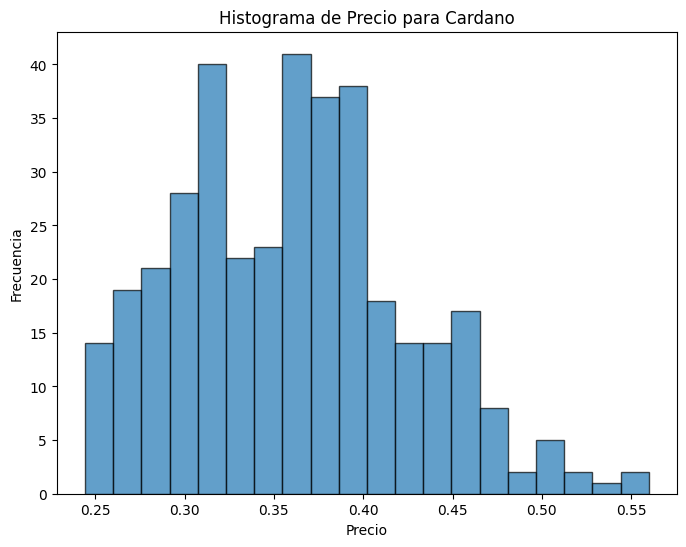

C:\Users\carlo\AppData\Local\Temp\ipykernel_16724\2209662582.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ada_df['volume'], shade=True)


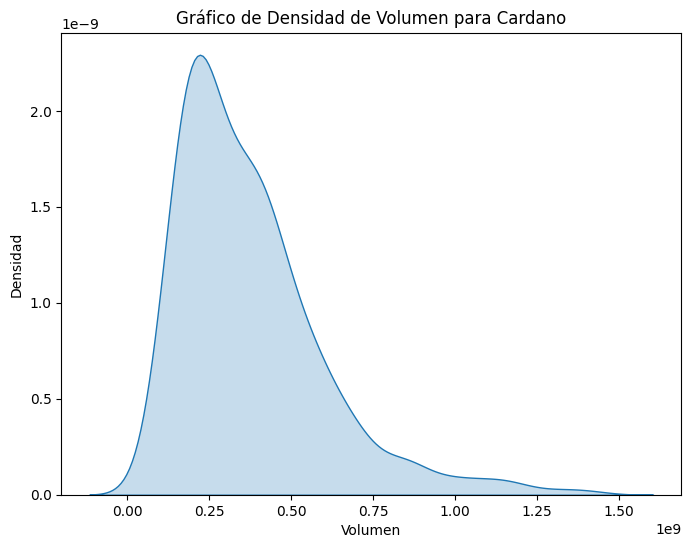

In [107]:
# Crear histograma de precios para Cardano
plt.figure(figsize=(8, 6))
plt.hist(ada_df['price'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precio para Cardano')
plt.show()

# Crear gráfico de densidad de volúmenes para Cardano
plt.figure(figsize=(8, 6))
sns.kdeplot(ada_df['volume'], shade=True)
plt.xlabel('Volumen')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Volumen para Cardano')
plt.show()

En cardano la media de precios es de 0.36 centavos de dolar y el precio mas frecuente es de 0.36 centavos de dolar. 

En cuanto a la densidad de su volumen sucede algo similar que con bitcoin, se ve un claro sesgo positivo hacia la derecha lo cual indica que hay un volumen de transacciones significativo en los valores más altos. Esto podría sugerir una actividad comercial intensa cuando los precios suben o cuando se producen movimientos bruscos en el mercado

Solana

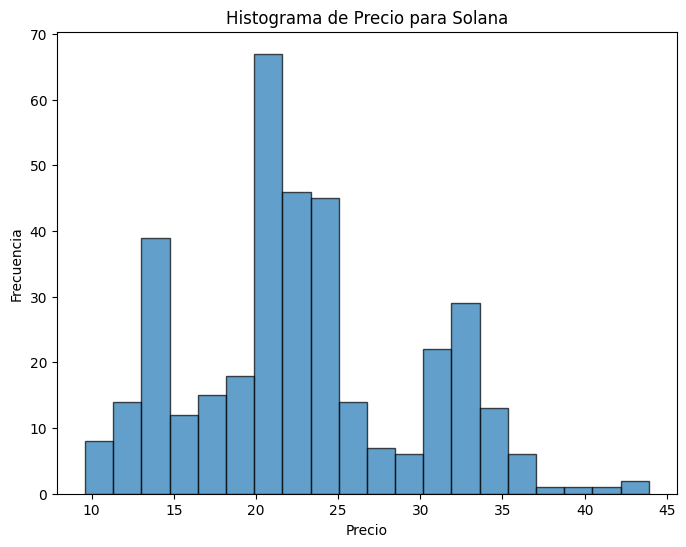

C:\Users\carlo\AppData\Local\Temp\ipykernel_16724\2153632869.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sol_df['volume'], shade=True)


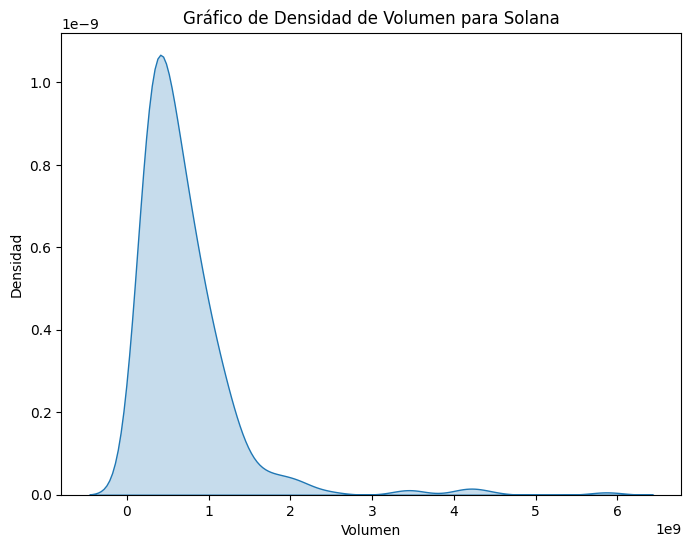

In [108]:
# Crear histograma de precios para Solana
plt.figure(figsize=(8, 6))
plt.hist(sol_df['price'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precio para Solana')
plt.show()

# Crear gráfico de densidad de volúmenes para Solana
plt.figure(figsize=(8, 6))
sns.kdeplot(sol_df['volume'], shade=True)
plt.xlabel('Volumen')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Volumen para Solana')
plt.show()

La media de solana es de 22 dolares con un precio maximo frecuentado de 21 dolares.

Con un volumen extremadamente angosto podría indicar que ha habido muy poca actividad de negociación en la criptomoneda. Esto podría deberse a una falta de interés o liquidez en el mercado para esa moneda en particular.

Avalanche

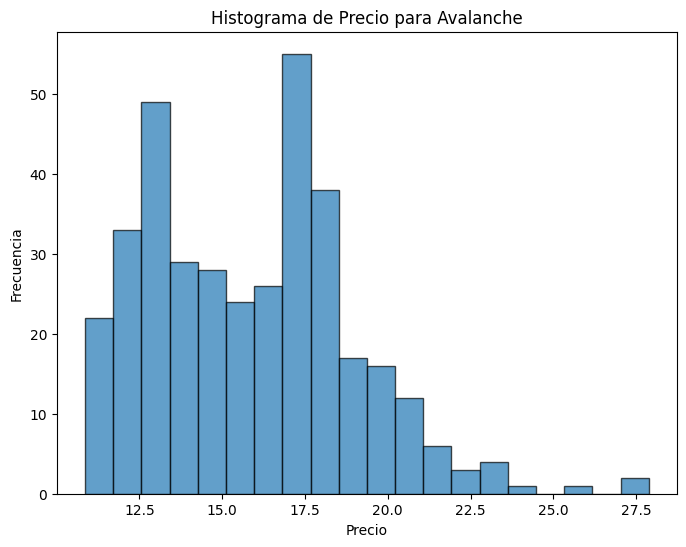

C:\Users\carlo\AppData\Local\Temp\ipykernel_16724\3464056381.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(avax_df['volume'], shade=True)


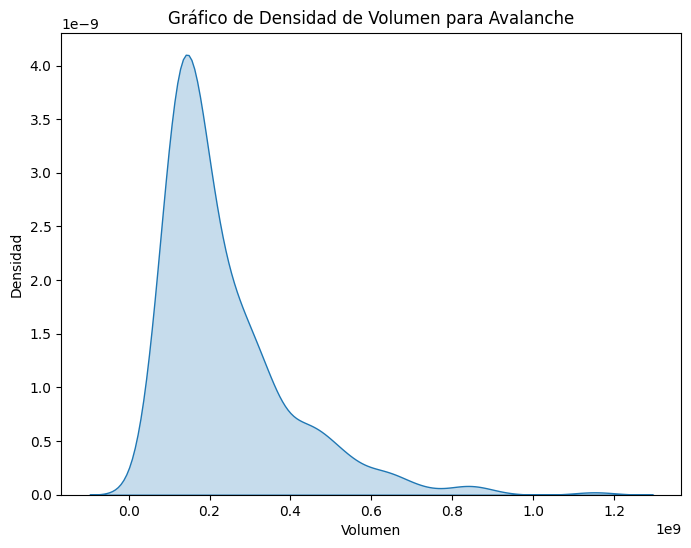

In [109]:
# Crear histograma de precios para Avalanche
plt.figure(figsize=(8, 6))
plt.hist(avax_df['price'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precio para Avalanche')
plt.show()

# Crear gráfico de densidad de volúmenes para Avalanche
plt.figure(figsize=(8, 6))
sns.kdeplot(avax_df['volume'], shade=True)
plt.xlabel('Volumen')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Volumen para Avalanche')
plt.show()

En avalanche la media de precios esta en los 15 dolares y el precio mas frecuentado es de 17 dolares.

La densidad del volumen es un poco menos angosta por lo cual hay un poco mas de actividad en la negociacion de la criptomoneda.

The Sandbox

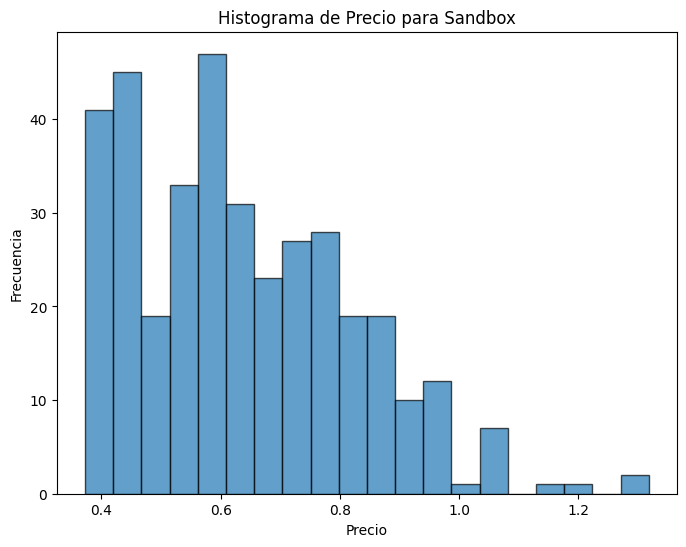

C:\Users\carlo\AppData\Local\Temp\ipykernel_16724\2083334892.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sand_df['volume'], shade=True)


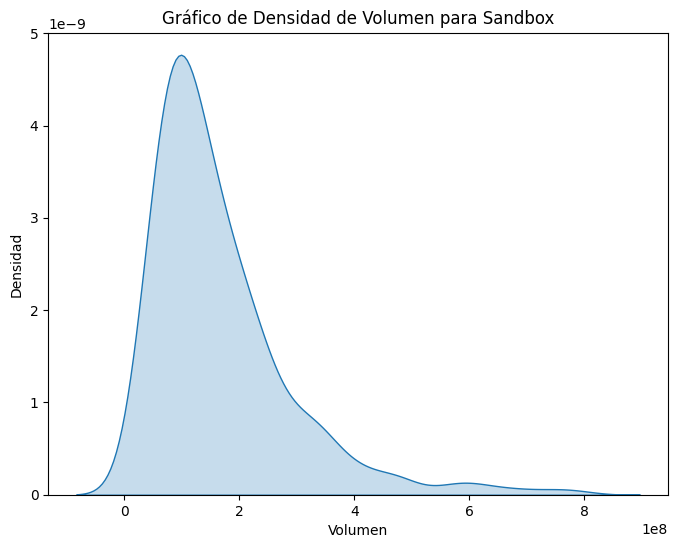

In [110]:
# Crear histograma de precios para Sandbox
plt.figure(figsize=(8, 6))
plt.hist(sand_df['price'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precio para Sandbox')
plt.show()

# Crear gráfico de densidad de volúmenes para Sandbox
plt.figure(figsize=(8, 6))
sns.kdeplot(sand_df['volume'], shade=True)
plt.xlabel('Volumen')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Volumen para Sandbox')
plt.show()

La media de sandbox es de 0.63 centavos de dolar y su precio mas frecuentado es de 0.61 centavos de dolar.

La densidad del volumen es incluso menos angosta que la anterior, lo cual induce un poco mas de actividad en las negociaciones que avalanche.

Evolucion de los precios, volumenes, y capitalizacion del mercado a lo largo del tiempo en graficos lineales

Bitcoin

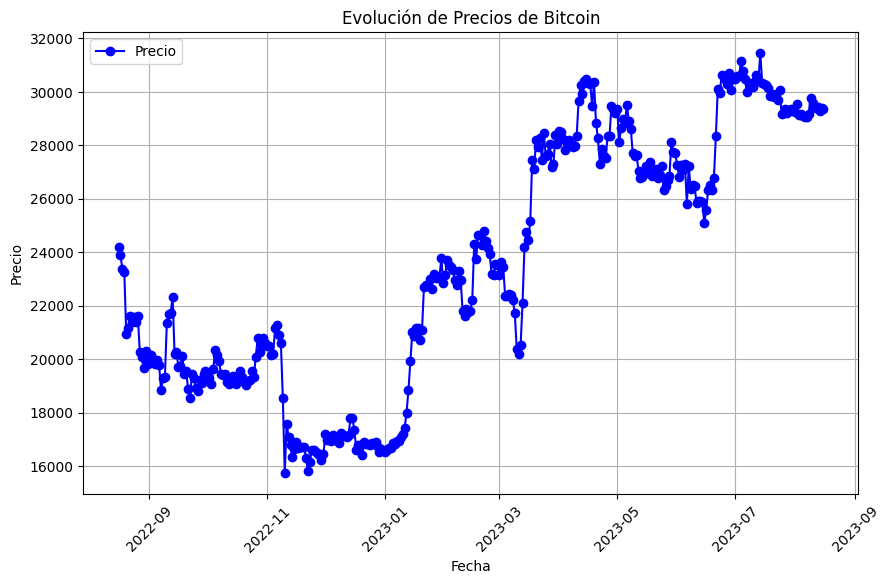

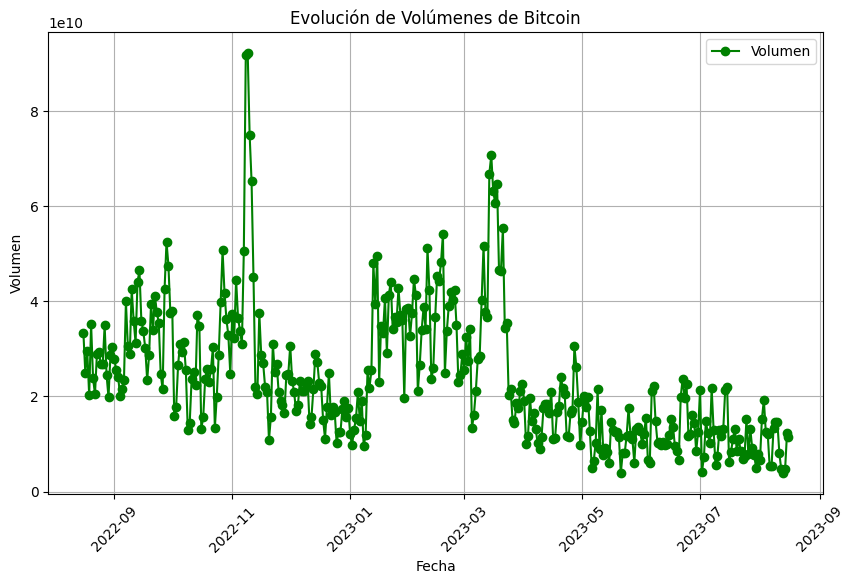

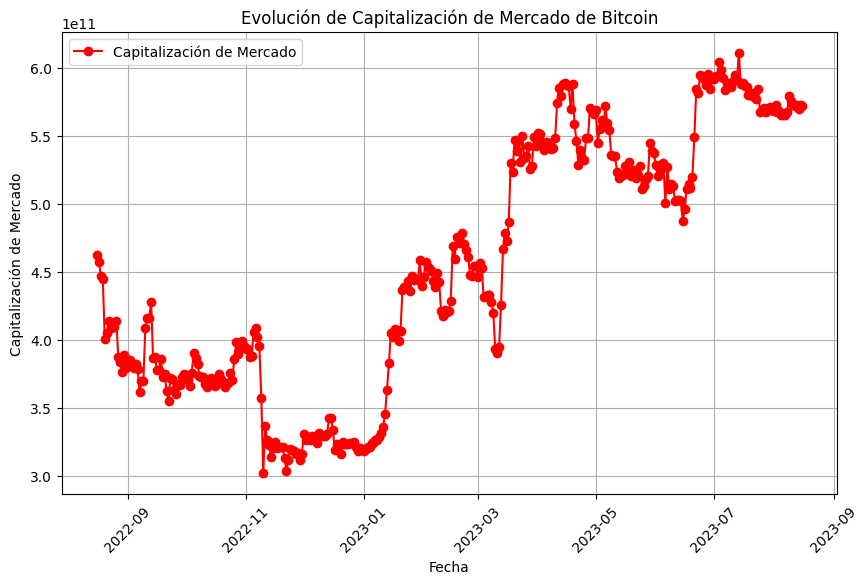

In [61]:
# Crear gráfico de evolución de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(btc_df['timestamp'], btc_df['price'], marker='o', linestyle='-', color='b', label='Precio')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Evolución de Precios de Bitcoin')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de volúmenes a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(btc_df['timestamp'], btc_df['volume'], marker='o', linestyle='-', color='g', label='Volumen')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Evolución de Volúmenes de Bitcoin')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(btc_df['timestamp'], btc_df['market_cap'], marker='o', linestyle='-', color='r', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Evolución de Capitalización de Mercado de Bitcoin')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Dentro del ultimo año se ve una clara tendencia alcista en bitcoin en los precios.

Una pequeña tendencia bajista en su volumen transaccional.

Y una gran evolucion en su evolucion de capitalizacion de mercado.

Ethereum

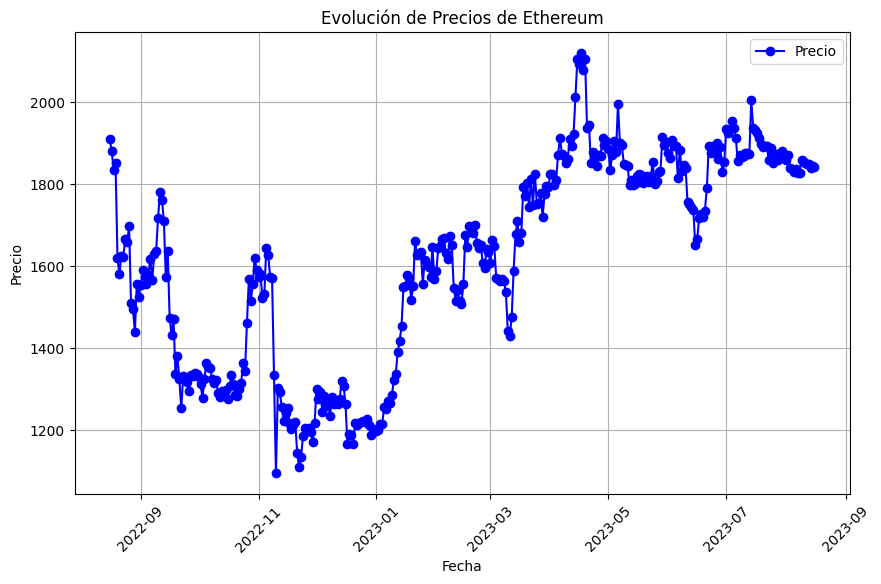

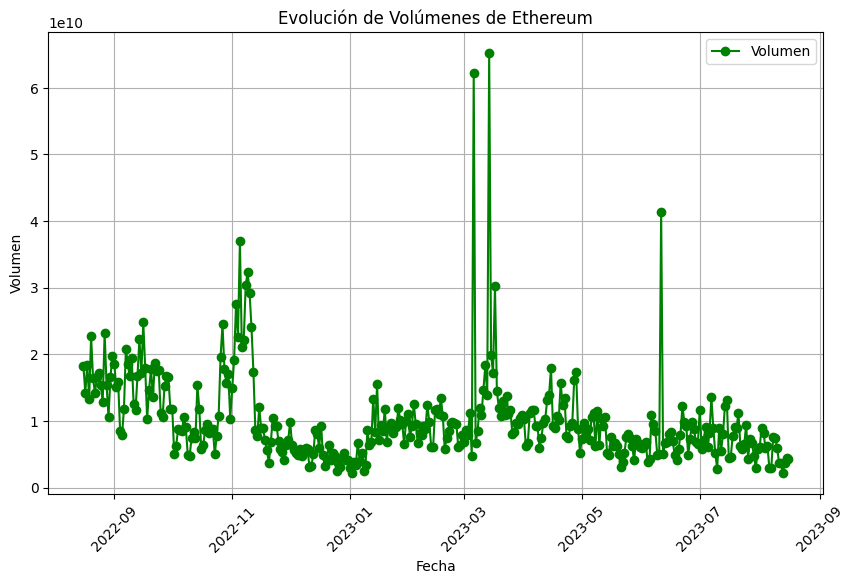

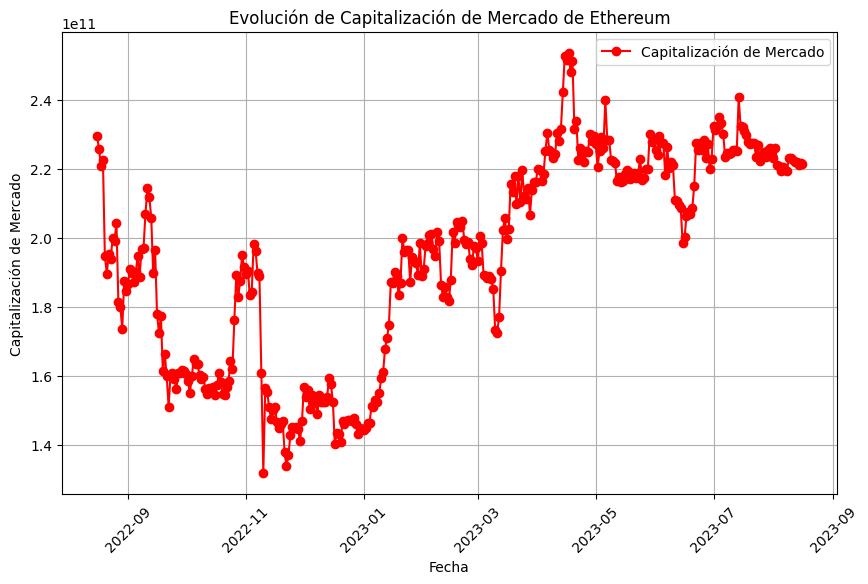

In [62]:
# Crear gráfico de evolución de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(eth_df['timestamp'], eth_df['price'], marker='o', linestyle='-', color='b', label='Precio')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Evolución de Precios de Ethereum')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de volúmenes a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(eth_df['timestamp'], eth_df['volume'], marker='o', linestyle='-', color='g', label='Volumen')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Evolución de Volúmenes de Ethereum')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(eth_df['timestamp'], eth_df['market_cap'], marker='o', linestyle='-', color='r', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Evolución de Capitalización de Mercado de Ethereum')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

En ethereum una evolucion de precios similar a la de bitcoin(alcista).

Una evolucion de volumenes bastante regular con algun que otro valor que se dispara, sin embargo, va marcando de a poco en este ultimo año una tendencia bajista.

Y su capitalizacion de mercado es alcista tambien.

Binance coin

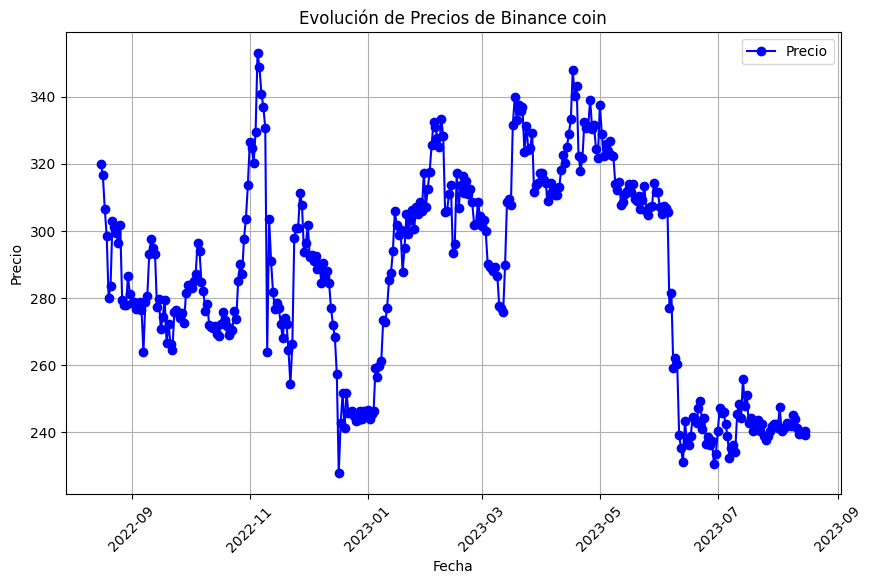

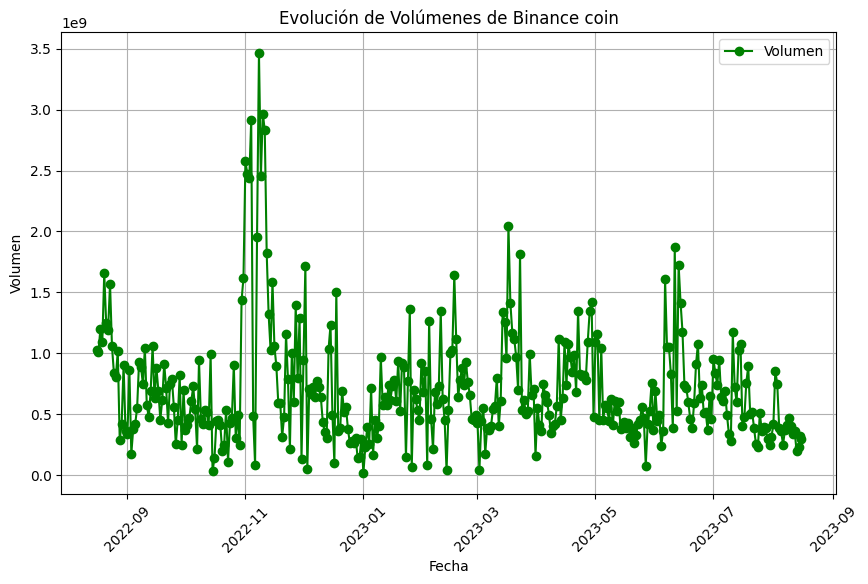

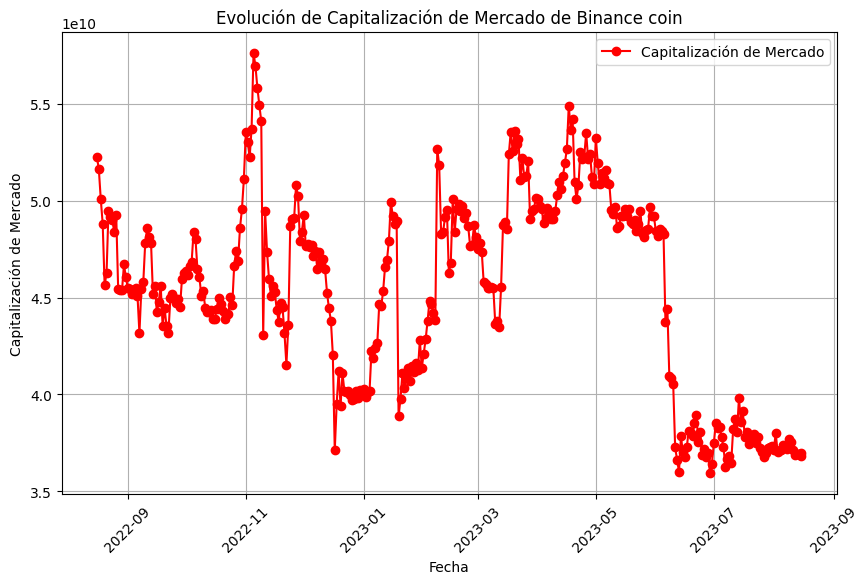

In [63]:
# Crear gráfico de evolución de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(bnb_df['timestamp'], bnb_df['price'], marker='o', linestyle='-', color='b', label='Precio')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Evolución de Precios de Binance coin')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de volúmenes a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(bnb_df['timestamp'], bnb_df['volume'], marker='o', linestyle='-', color='g', label='Volumen')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Evolución de Volúmenes de Binance coin')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(bnb_df['timestamp'], bnb_df['market_cap'], marker='o', linestyle='-', color='r', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Evolución de Capitalización de Mercado de Binance coin')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Con binance coin venia en tendencia alcista hasta que en mayo de 2023 hubo un quiebre que hizo bajar su valor desde las nubes hasta el suelo, sin embargo, se esta recuperando de a poco.

Presenta una evolucion de volumen bastante regular sin una tendencia claramente marcada, pero con valores crecientes en diciembre de 2022.

Y con la capitalizacion de mercado ocurre algo similar que con su precio, en mayo de 2023 hubo un quiebre que hizo bajar su valor desde las nubes hasta el suelo, sin embargo, se esta recuperando de a poco.

Tether

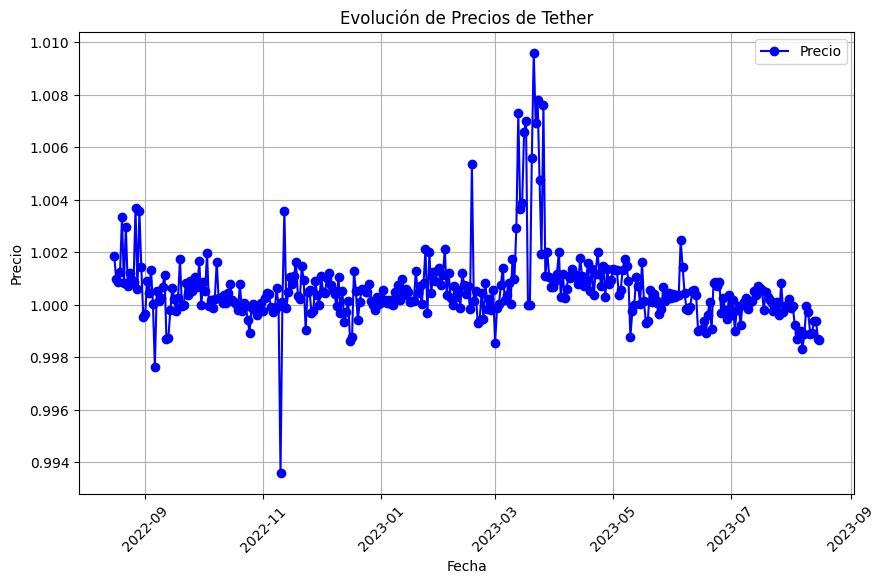

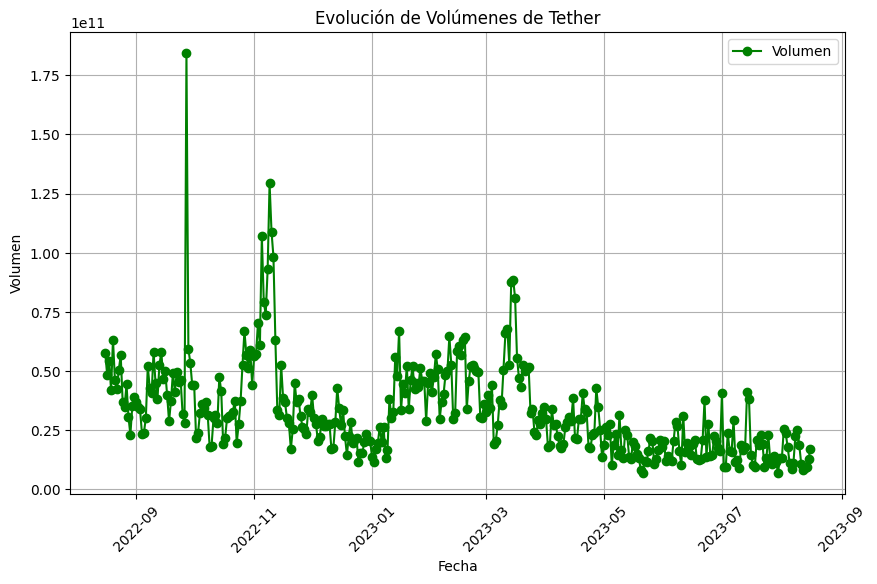

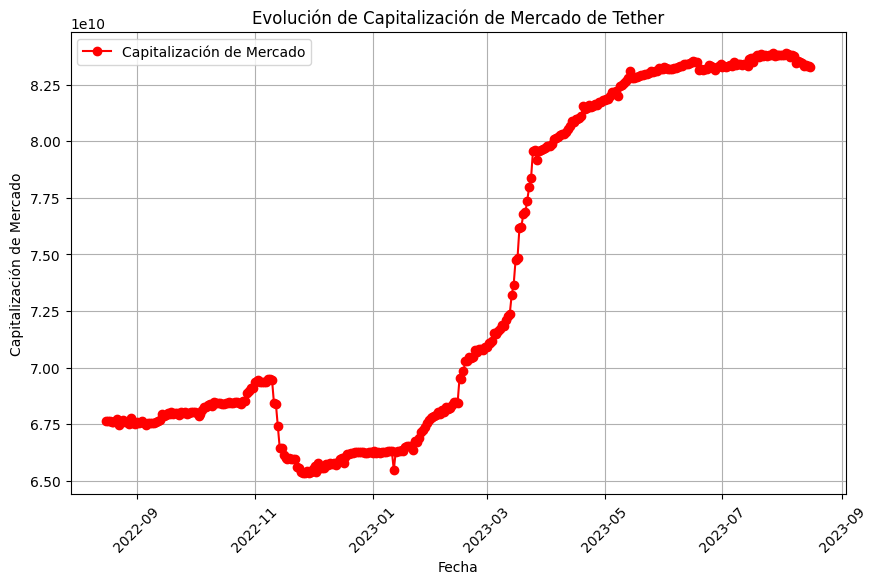

In [64]:
# Crear gráfico de evolución de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(tether_df['timestamp'], tether_df['price'], marker='o', linestyle='-', color='b', label='Precio')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Evolución de Precios de Tether')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de volúmenes a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(tether_df['timestamp'], tether_df['volume'], marker='o', linestyle='-', color='g', label='Volumen')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Evolución de Volúmenes de Tether')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(tether_df['timestamp'], tether_df['market_cap'], marker='o', linestyle='-', color='r', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Evolución de Capitalización de Mercado de Tether')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Al ser una moneda de cambio bastante recurrida y menos volatil, es logico que el precio de tether se mantenga siempre regular en el dolar, aunque actualmente presenta una pequeña disminucion.

La misma regularidad se presenta en la evolucion de su volumen, con un pequeño descenso en estos ultimos meses.

Por ultimo, una gran tendencia alcista en la evolucion de su capitalizacion de mercado.

Ripple

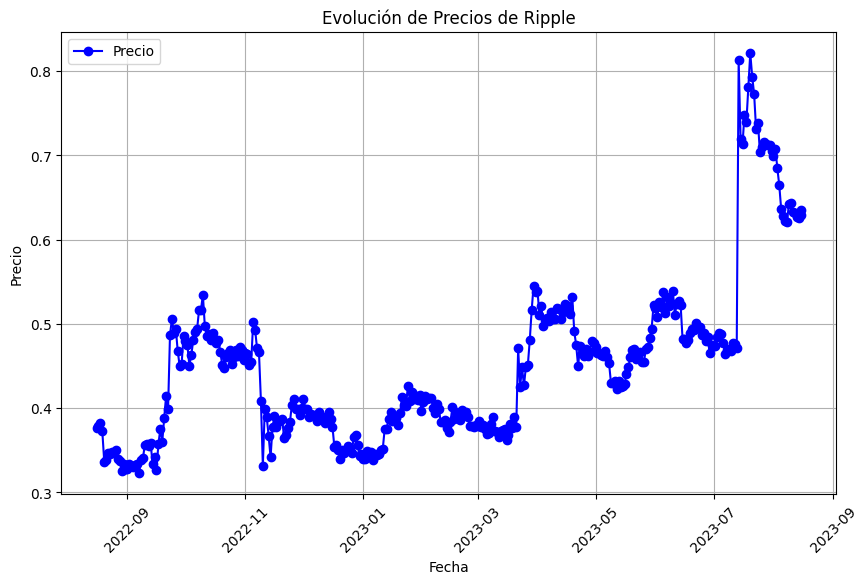

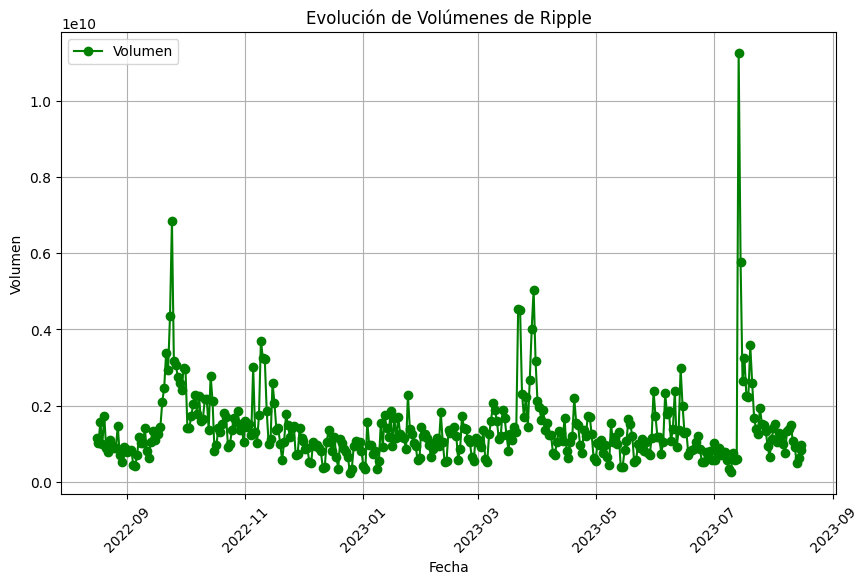

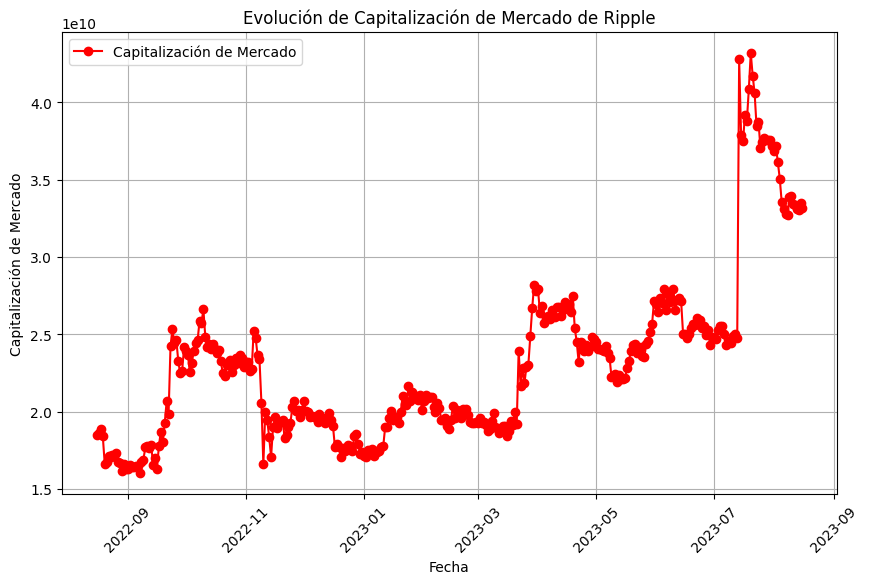

In [65]:
# Crear gráfico de evolución de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(xrp_df['timestamp'], xrp_df['price'], marker='o', linestyle='-', color='b', label='Precio')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Evolución de Precios de Ripple')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de volúmenes a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(xrp_df['timestamp'], xrp_df['volume'], marker='o', linestyle='-', color='g', label='Volumen')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Evolución de Volúmenes de Ripple')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(xrp_df['timestamp'], xrp_df['market_cap'], marker='o', linestyle='-', color='r', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Evolución de Capitalización de Mercado de Ripple')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

En la evolucion de precios de ripple vemos una clara tendencia alcista.

Presenta una evolucion de volumenes transacionales bastante regular.

Y tambien una tendencia alcista en la evolucion de capitalizacion de mercado.

Litecoin

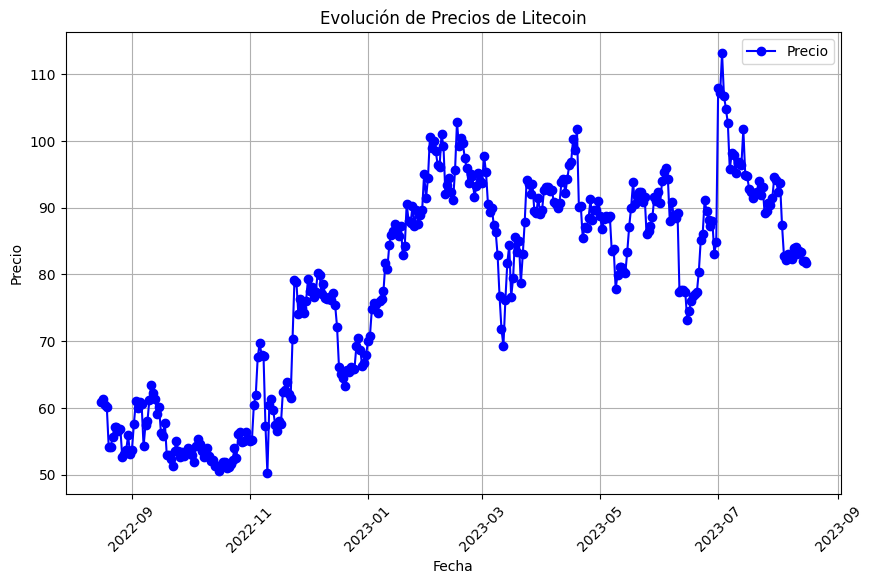

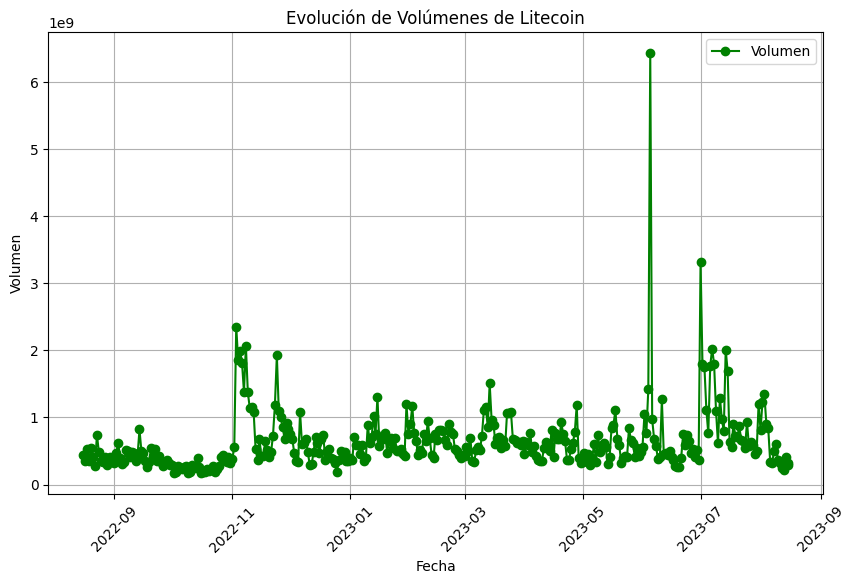

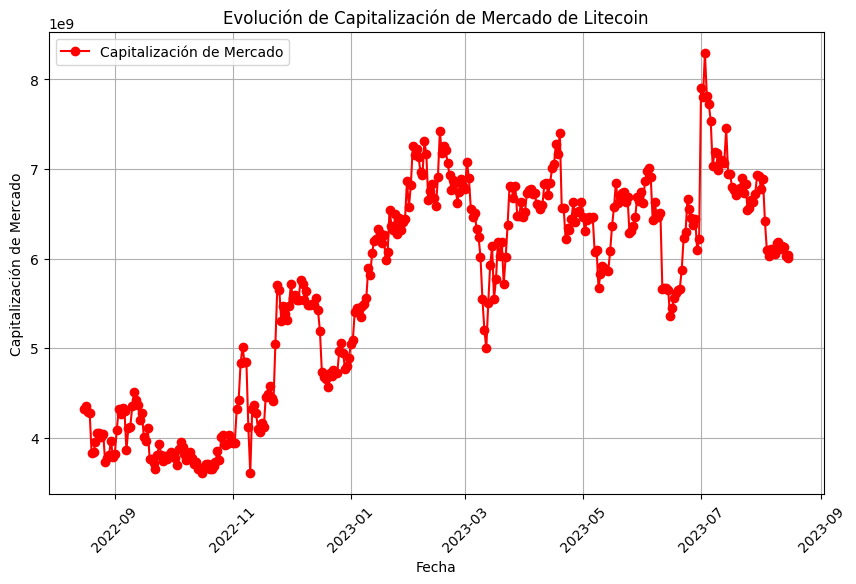

In [66]:
# Crear gráfico de evolución de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(ltc_df['timestamp'], ltc_df['price'], marker='o', linestyle='-', color='b', label='Precio')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Evolución de Precios de Litecoin')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de volúmenes a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(ltc_df['timestamp'], ltc_df['volume'], marker='o', linestyle='-', color='g', label='Volumen')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Evolución de Volúmenes de Litecoin')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(ltc_df['timestamp'], ltc_df['market_cap'], marker='o', linestyle='-', color='r', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Evolución de Capitalización de Mercado de Litecoin')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Para litecoin, tambien se ve reflejada en este ultimo año una gran tendencia alcista.

Al igual que ripple una tendencia bastante regular en la evolucion de volumenes.

Finalmente, una tendencia alcista bastante marcada en la evolucion historica de capitalizacion de mercado.

Cardano

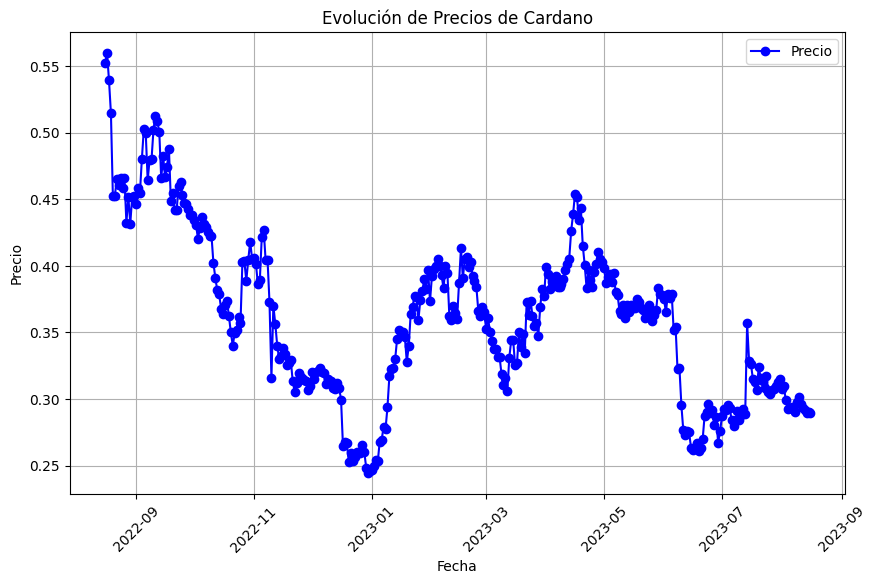

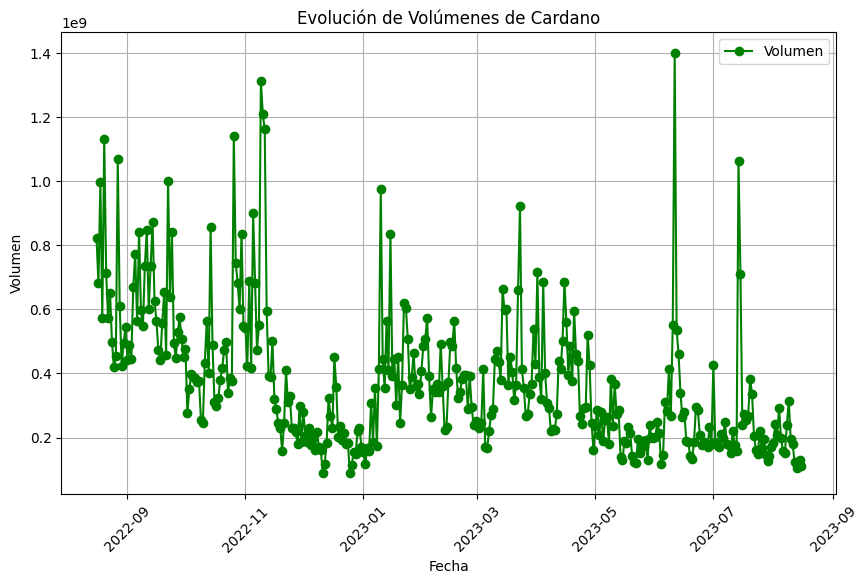

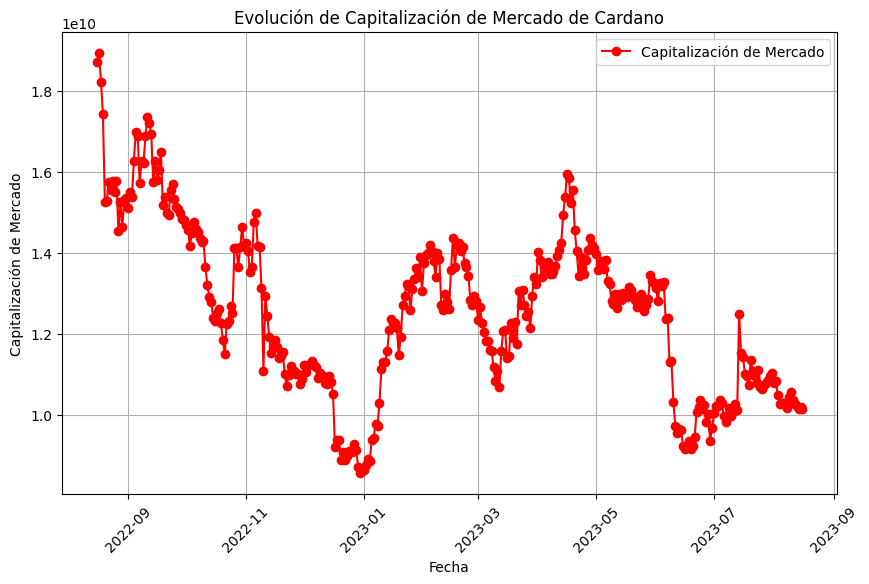

In [67]:
# Crear gráfico de evolución de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(ada_df['timestamp'], ada_df['price'], marker='o', linestyle='-', color='b', label='Precio')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Evolución de Precios de Cardano')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de volúmenes a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(ada_df['timestamp'], ada_df['volume'], marker='o', linestyle='-', color='g', label='Volumen')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Evolución de Volúmenes de Cardano')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(ada_df['timestamp'], ada_df['market_cap'], marker='o', linestyle='-', color='r', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Evolución de Capitalización de Mercado de Cardano')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Para cardano vemos una tendencia bajista general en su evolucion de precios, sin embargo, en estos ultimos meses tuvo una recuperacion a tener en cuenta.

Viene con una evolucion de volumen bastante irregular en bajada.

Y para la evolucion de capitalizacion de mercado sucede lo mismo que con el precio.

Solana

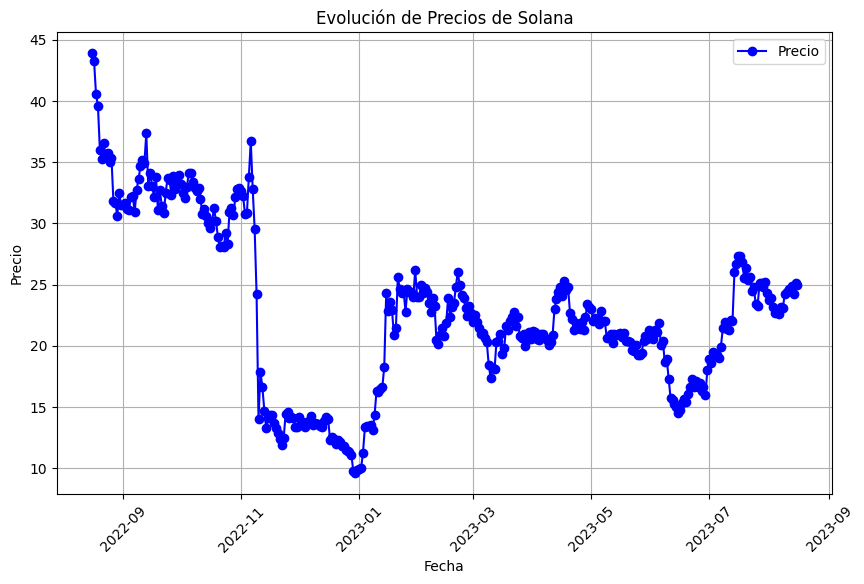

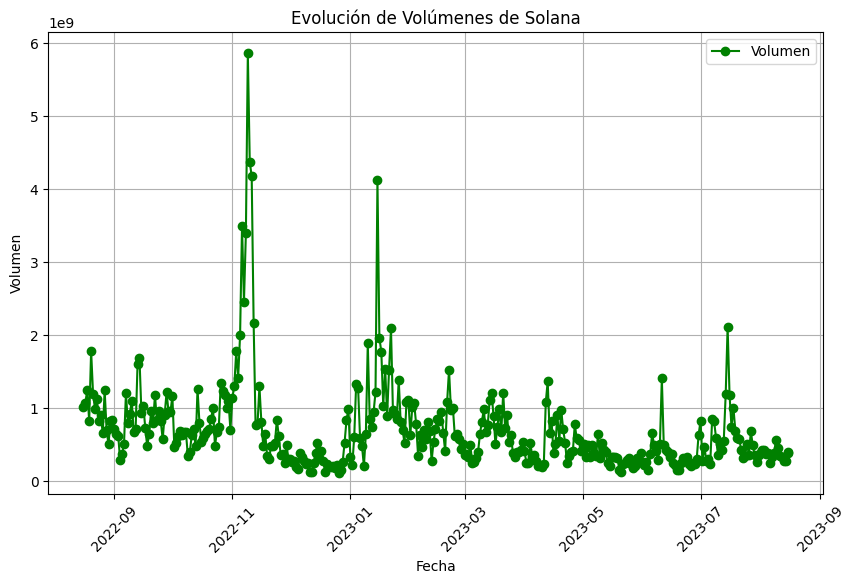

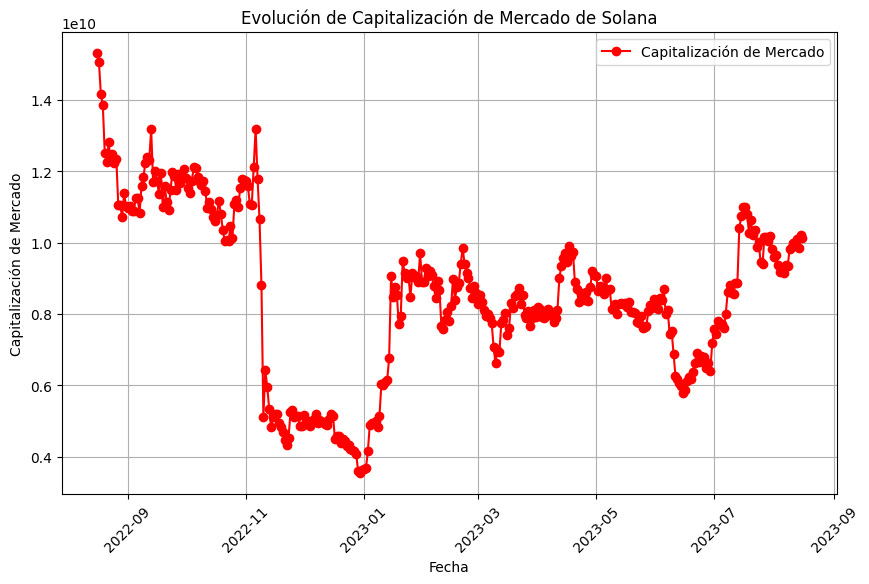

In [68]:
# Crear gráfico de evolución de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(sol_df['timestamp'], sol_df['price'], marker='o', linestyle='-', color='b', label='Precio')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Evolución de Precios de Solana')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de volúmenes a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(sol_df['timestamp'], sol_df['volume'], marker='o', linestyle='-', color='g', label='Volumen')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Evolución de Volúmenes de Solana')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(sol_df['timestamp'], sol_df['market_cap'], marker='o', linestyle='-', color='r', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Evolución de Capitalización de Mercado de Solana')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Solana venia en bajada hasta principio de este año, cuando finalmente retomo vuelo y actualmente presenta una tendencia alcista.

Presenta un volumen bastante regular.

Y sucede algo similar que con el precio en la capitalizacion de mercado.

Avalanche

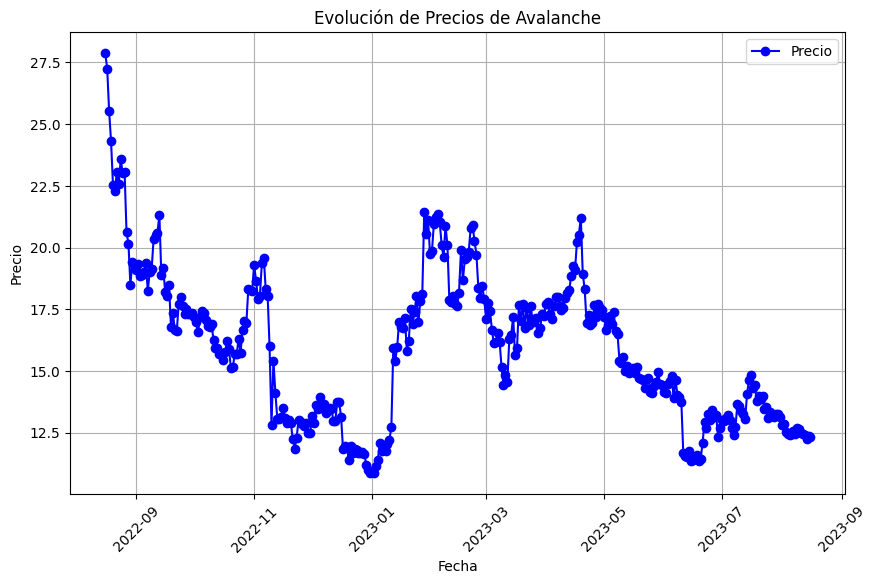

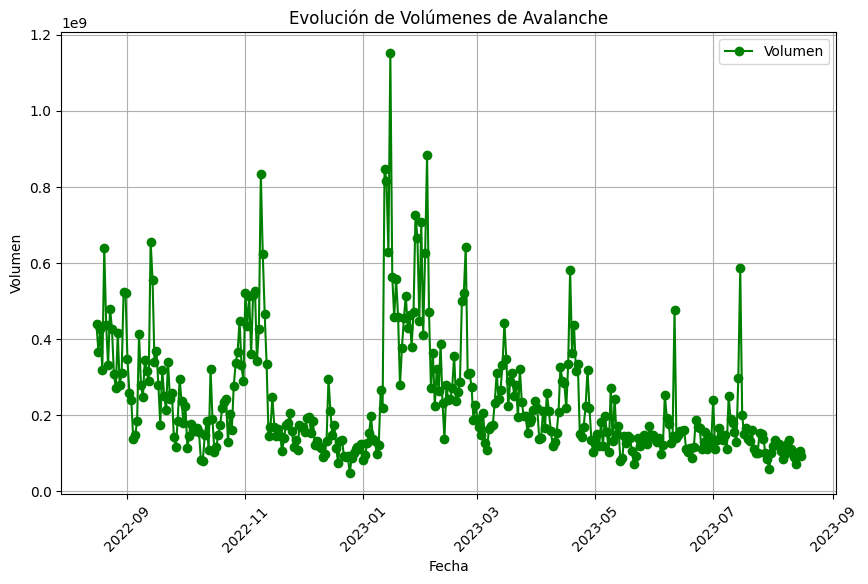

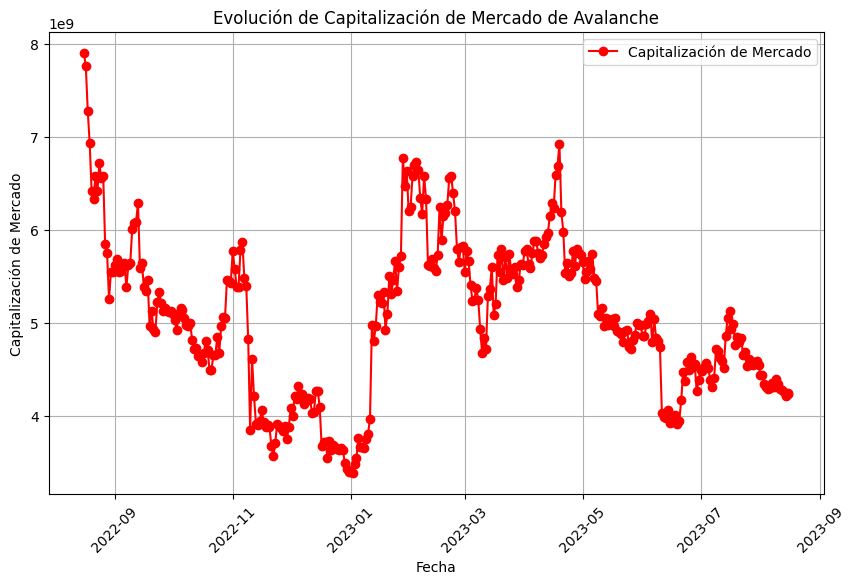

In [69]:
# Crear gráfico de evolución de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(avax_df['timestamp'], avax_df['price'], marker='o', linestyle='-', color='b', label='Precio')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Evolución de Precios de Avalanche')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de volúmenes a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(avax_df['timestamp'], avax_df['volume'], marker='o', linestyle='-', color='g', label='Volumen')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Evolución de Volúmenes de Avalanche')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(avax_df['timestamp'], avax_df['market_cap'], marker='o', linestyle='-', color='r', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Evolución de Capitalización de Mercado de Avalanche')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Mas alla de la recuperacion en enero de este año que tuvo Avalanche en su precio, tuvo varias caidas de precio marcadas lo cual lo deja actualmente en tendencia bajista.

Una evolucion de volumenes algo irregular con fuertes movimientos en diciembre de 2022 y enero de 2023.

Y una capitalizacion de mercado similar a la evolucion de su precio, con una recuperacion en enero de este año, pero tuvo varias caidas de precio marcadas lo cual lo deja actualmente en tendencia bajista.

The Sandbox

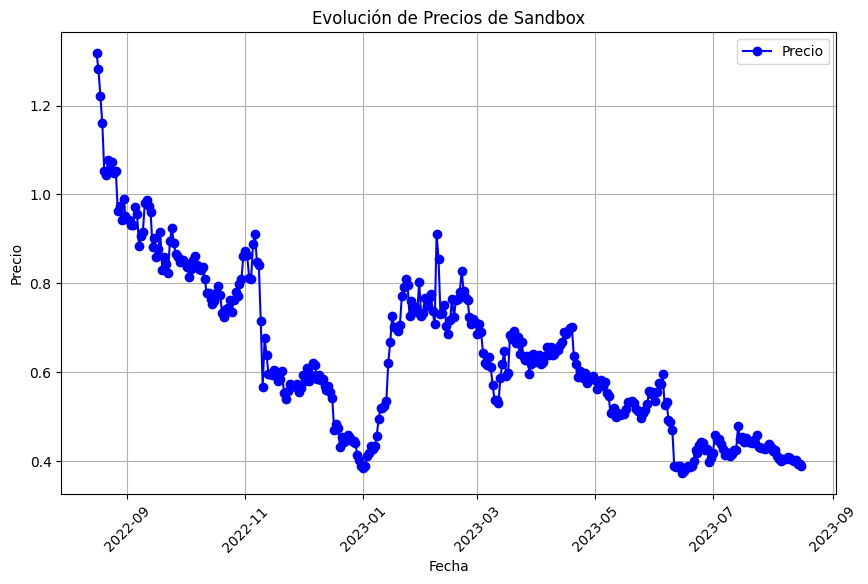

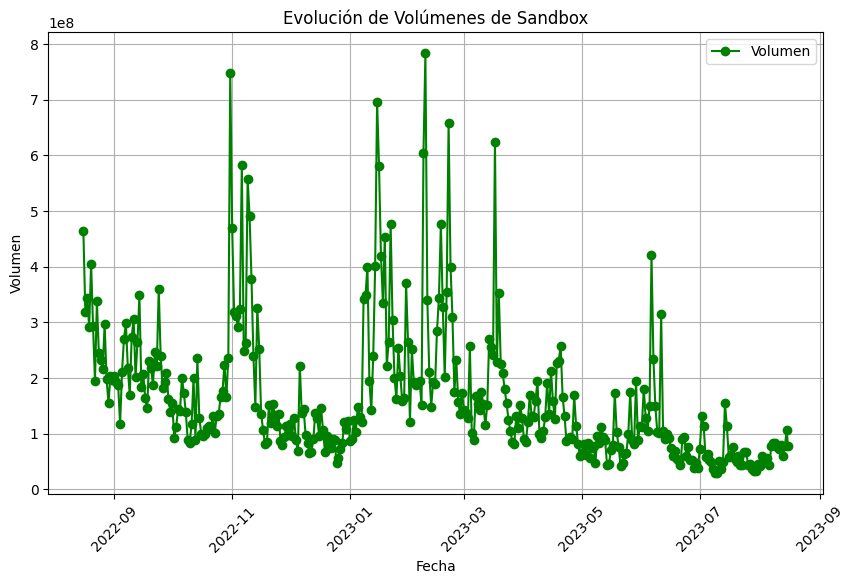

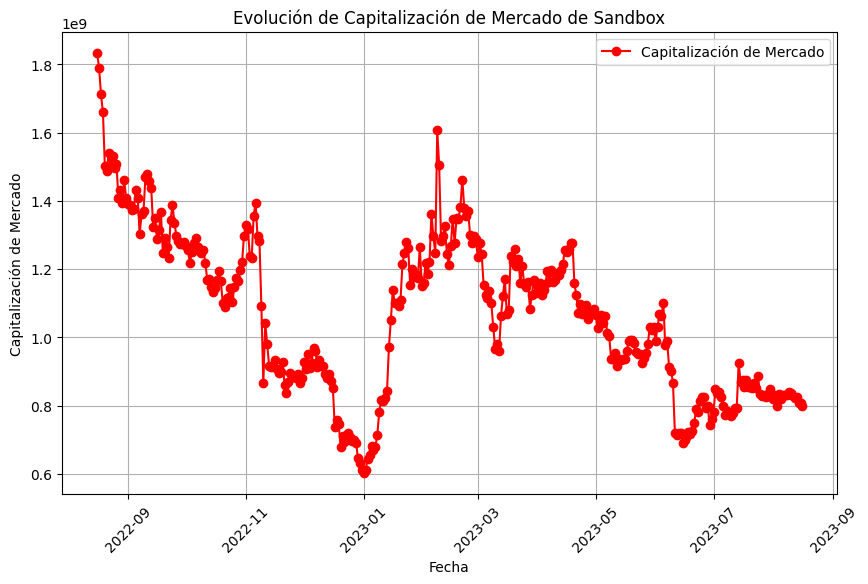

In [70]:
# Crear gráfico de evolución de precios a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(sand_df['timestamp'], sand_df['price'], marker='o', linestyle='-', color='b', label='Precio')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Evolución de Precios de Sandbox')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de volúmenes a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(sand_df['timestamp'], sand_df['volume'], marker='o', linestyle='-', color='g', label='Volumen')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Evolución de Volúmenes de Sandbox')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Crear gráfico de evolución de capitalización de mercado a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(sand_df['timestamp'], sand_df['market_cap'], marker='o', linestyle='-', color='r', label='Capitalización de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.title('Evolución de Capitalización de Mercado de Sandbox')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

En The Sandbox este ultimo año se ve reflejado una clara caida de los precios con tendencia actualmente bajista y con un  intento de repunte en enero de este año.

Una evolucion de volumen bastante irregular pero con una pequeña marcada tendencia bajista.

La capitalizacion de mercado es similar al precio en cuanto a tendencia bajista pero es mas alta en valores.

Graficos de volatilidad para calcular la variabilidad de los precios a lo largo del tiempo

Bitcoin

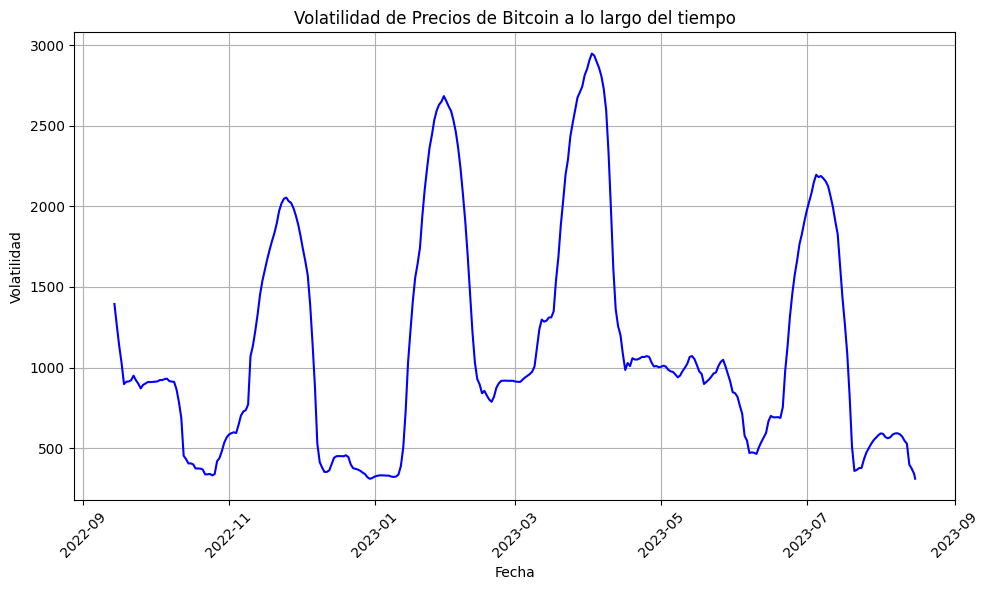

In [81]:
# Calcula la volatilidad (por ejemplo, usando la desviación estándar móvil)
window_size = 30  # Tamaño de la ventana móvil para el cálculo de la volatilidad
btc_df['volatility'] = btc_df['price'].rolling(window=window_size).std()

# Crear el gráfico de volatilidad
plt.figure(figsize=(10, 6))
plt.plot(btc_df['timestamp'], btc_df['volatility'], color='b')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.title('Volatilidad de Precios de Bitcoin a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Ethereum

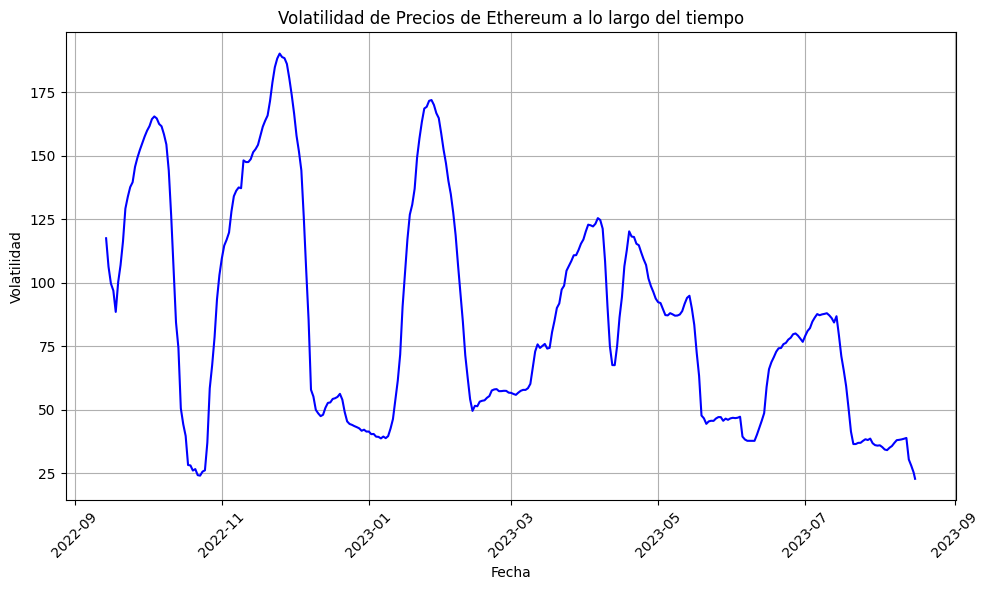

In [82]:
# Calcula la volatilidad (por ejemplo, usando la desviación estándar móvil)
window_size = 30  # Tamaño de la ventana móvil para el cálculo de la volatilidad
eth_df['volatility'] = eth_df['price'].rolling(window=window_size).std()

# Crear el gráfico de volatilidad
plt.figure(figsize=(10, 6))
plt.plot(eth_df['timestamp'], eth_df['volatility'], color='b')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.title('Volatilidad de Precios de Ethereum a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Binance coin

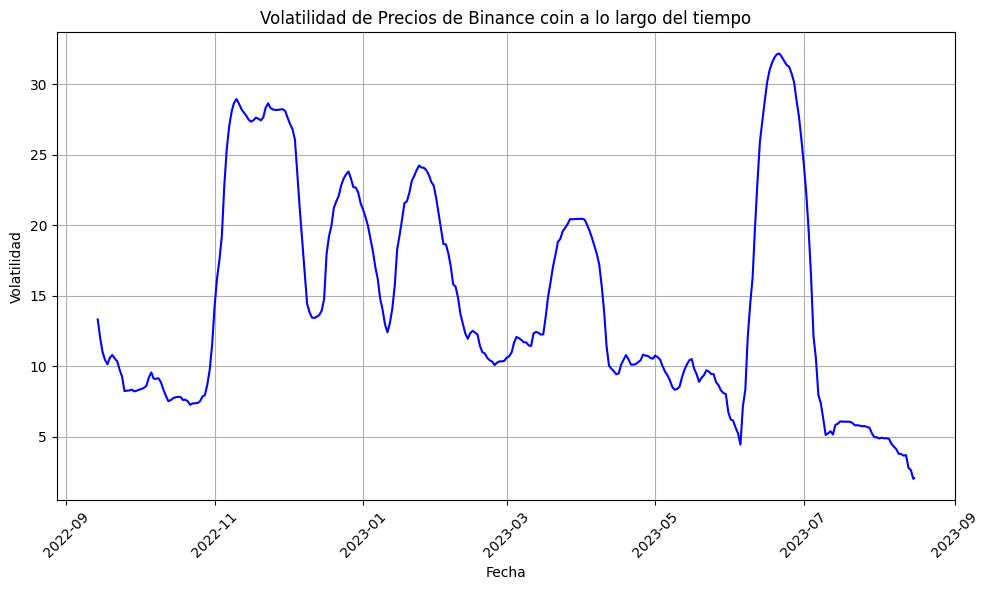

In [83]:
# Calcula la volatilidad (por ejemplo, usando la desviación estándar móvil)
window_size = 30  # Tamaño de la ventana móvil para el cálculo de la volatilidad
bnb_df['volatility'] = bnb_df['price'].rolling(window=window_size).std()

# Crear el gráfico de volatilidad
plt.figure(figsize=(10, 6))
plt.plot(bnb_df['timestamp'], bnb_df['volatility'], color='b')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.title('Volatilidad de Precios de Binance coin a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Tether

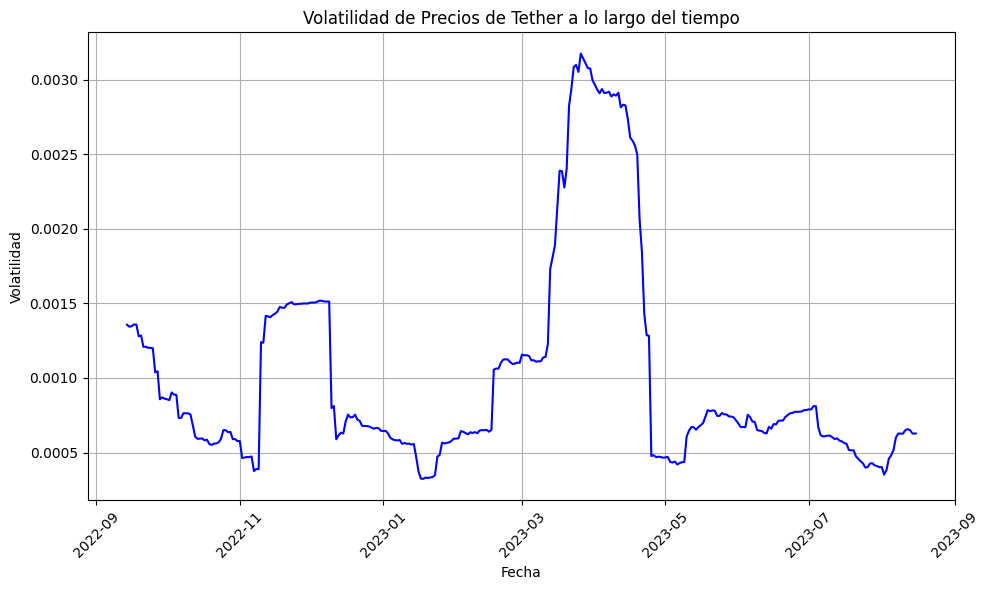

In [84]:
# Calcula la volatilidad (por ejemplo, usando la desviación estándar móvil)
window_size = 30  # Tamaño de la ventana móvil para el cálculo de la volatilidad
tether_df['volatility'] = tether_df['price'].rolling(window=window_size).std()

# Crear el gráfico de volatilidad
plt.figure(figsize=(10, 6))
plt.plot(tether_df['timestamp'], tether_df['volatility'], color='b')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.title('Volatilidad de Precios de Tether a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Ripple

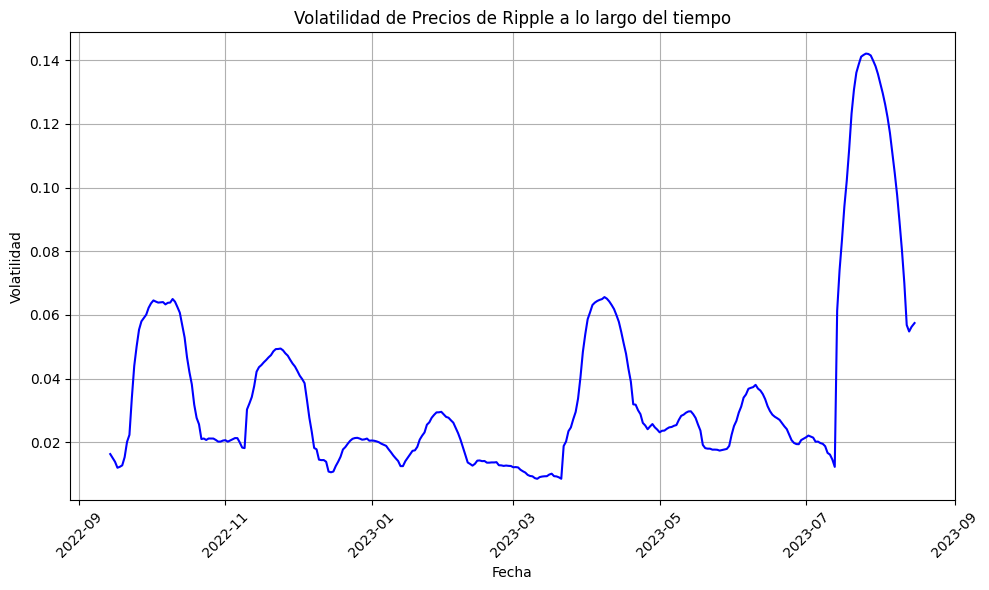

In [85]:
# Calcula la volatilidad (por ejemplo, usando la desviación estándar móvil)
window_size = 30  # Tamaño de la ventana móvil para el cálculo de la volatilidad
xrp_df['volatility'] = xrp_df['price'].rolling(window=window_size).std()

# Crear el gráfico de volatilidad
plt.figure(figsize=(10, 6))
plt.plot(xrp_df['timestamp'], xrp_df['volatility'], color='b')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.title('Volatilidad de Precios de Ripple a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Litecoin

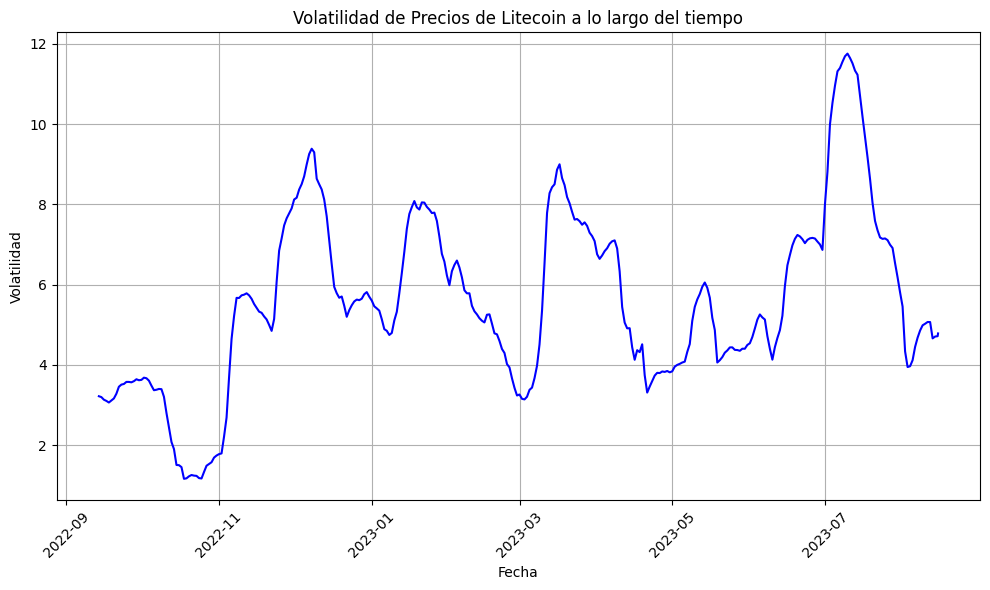

In [86]:
# Calcula la volatilidad (por ejemplo, usando la desviación estándar móvil)
window_size = 30  # Tamaño de la ventana móvil para el cálculo de la volatilidad
ltc_df['volatility'] = ltc_df['price'].rolling(window=window_size).std()

# Crear el gráfico de volatilidad
plt.figure(figsize=(10, 6))
plt.plot(ltc_df['timestamp'], ltc_df['volatility'], color='b')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.title('Volatilidad de Precios de Litecoin a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Cardano

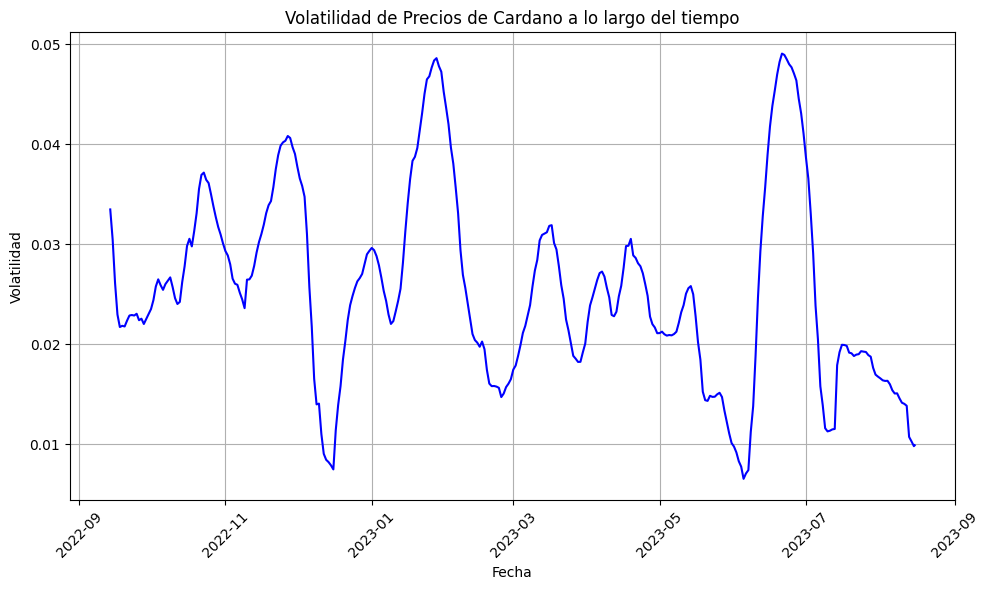

In [87]:
# Calcula la volatilidad (por ejemplo, usando la desviación estándar móvil)
window_size = 30  # Tamaño de la ventana móvil para el cálculo de la volatilidad
ada_df['volatility'] = ada_df['price'].rolling(window=window_size).std()

# Crear el gráfico de volatilidad
plt.figure(figsize=(10, 6))
plt.plot(ada_df['timestamp'], ada_df['volatility'], color='b')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.title('Volatilidad de Precios de Cardano a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Solana

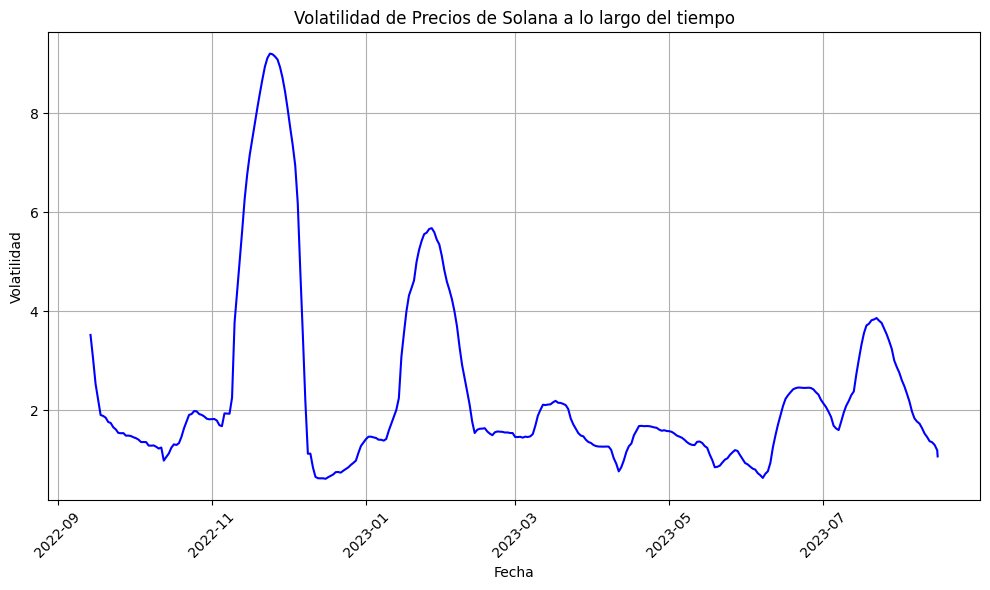

In [88]:
# Calcula la volatilidad (por ejemplo, usando la desviación estándar móvil)
window_size = 30  # Tamaño de la ventana móvil para el cálculo de la volatilidad
sol_df['volatility'] = sol_df['price'].rolling(window=window_size).std()

# Crear el gráfico de volatilidad
plt.figure(figsize=(10, 6))
plt.plot(sol_df['timestamp'], sol_df['volatility'], color='b')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.title('Volatilidad de Precios de Solana a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Avalanche

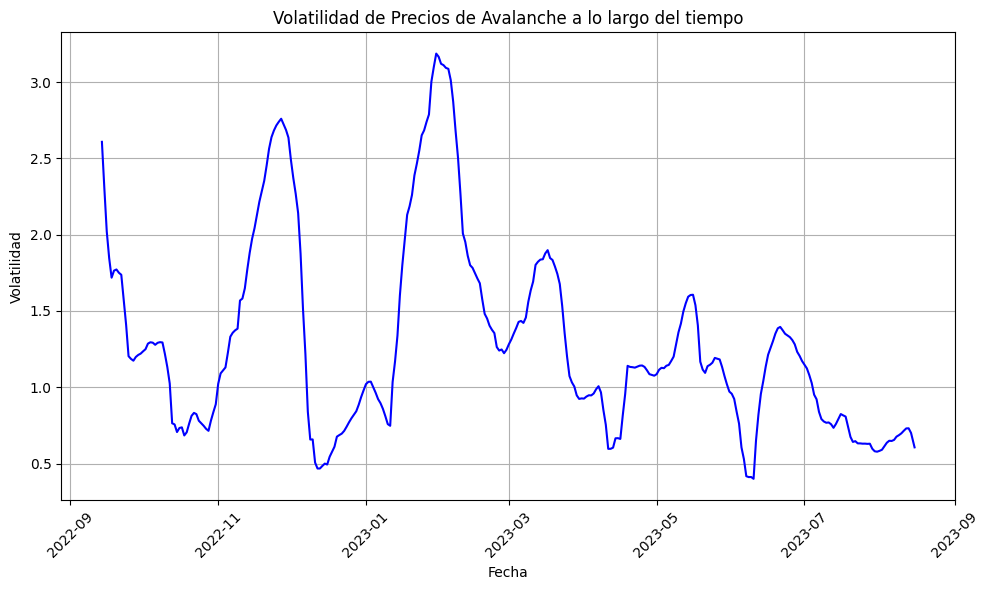

In [89]:
# Calcula la volatilidad (por ejemplo, usando la desviación estándar móvil)
window_size = 30  # Tamaño de la ventana móvil para el cálculo de la volatilidad
avax_df['volatility'] = avax_df['price'].rolling(window=window_size).std()

# Crear el gráfico de volatilidad
plt.figure(figsize=(10, 6))
plt.plot(avax_df['timestamp'], avax_df['volatility'], color='b')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.title('Volatilidad de Precios de Avalanche a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The Sandbox

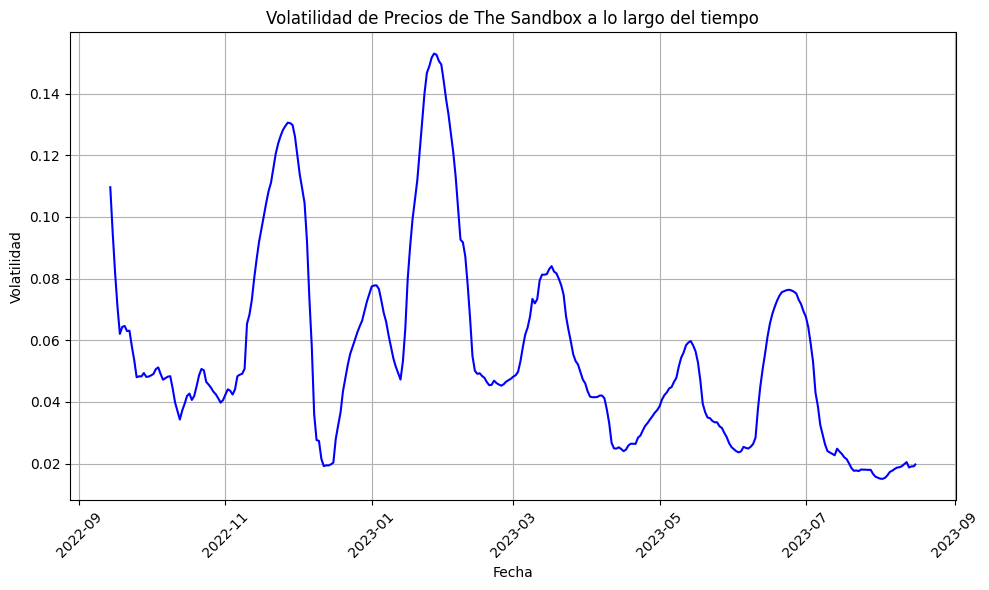

In [90]:
# Calcula la volatilidad (por ejemplo, usando la desviación estándar móvil)
window_size = 30  # Tamaño de la ventana móvil para el cálculo de la volatilidad
sand_df['volatility'] = sand_df['price'].rolling(window=window_size).std()

# Crear el gráfico de volatilidad
plt.figure(figsize=(10, 6))
plt.plot(sand_df['timestamp'], sand_df['volatility'], color='b')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.title('Volatilidad de Precios de The Sandbox a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

La conclusion en cuanto a la volatilidad, es que en resumen, las monedas mas volatiles son bitcoin, ethereum, binance coin, litecoin, cardano, avalanche y the sandbox.

Las que tienen menos movimiento volatil son: Ripple y solana.

Y la mas estable de todas de este top es tether.

En el transcurso de este análisis detallado de criptomonedas, se ha obtenido una comprensión profunda de su comportamiento y tendencias a través de una serie de visualizaciones y técnicas de análisis. Al centrarnos en los gráficos de comparación de estadísticas, histogramas de precios, gráficos de densidad de volumen, gráficos de evolución de precios, volúmenes y capitalización de mercado, y los gráficos de volatilidad, hemos logrado extraer información valiosa sobre estas 10 criptomonedas.

El gráfico de comparación de estadísticas nos ha permitido contrastar y comparar características clave entre las criptomonedas, destacando diferencias notables en métricas como precios promedio, medianas, volúmenes y capitalización de mercado. Esta visualización ha puesto de manifiesto cómo ciertas monedas pueden destacar en ciertas áreas mientras que otras muestran fuerzas en diferentes aspectos.

Los histogramas de precios han proporcionado una perspectiva clara sobre la distribución de los precios, permitiéndonos identificar rangos de precio más comunes y posibles valores atípicos que pueden indicar momentos de volatilidad extrema o eventos inusuales en el mercado.

Los gráficos de densidad de volumen han permitido entender cómo varía el volumen de negociación a lo largo del tiempo, y cómo estas variaciones pueden influir en las tendencias y movimientos de los precios. La forma y el sesgo de estos gráficos también han proporcionado información sobre la liquidez y la actividad comercial de cada criptomoneda.

En cuanto al análisis de tendencias a lo largo del tiempo, los gráficos de líneas han destacado la evolución de los precios, volúmenes y capitalización de mercado. Estos gráficos han permitido identificar patrones alcistas, bajistas y momentos de consolidación en cada criptomoneda, lo que puede ser útil para la toma de decisiones de inversión a largo plazo.

Por último, los gráficos de volatilidad de precios han destacado la variabilidad de los precios a lo largo del tiempo. La volatilidad puede influir en la percepción del riesgo y la oportunidad en el mercado de criptomonedas, lo que puede ser esencial para estrategias de inversión bien informadas.

Algunas criptomonedas presentan una mayor volatilidad, lo que podría indicar oportunidades de inversión a corto plazo pero también mayor riesgo.

En resumen, este análisis exhaustivo ha revelado patrones, tendencias y relaciones cruciales en el mercado de criptomonedas. La información obtenida a través de estas visualizaciones proporciona una base sólida para tomar decisiones financieras informadas y estratégicas. Al considerar las características únicas de cada criptomoneda y sus respectivas tendencias, los inversores pueden estar mejor equipados para capitalizar las oportunidades en un mercado en constante evolución.

En cuanto a la toma de decisiones para cada moneda y conclusion final que se podria tomar con cada una de ellas:

Bitcoin (BTC): Como la primera y más establecida criptomoneda, Bitcoin suele considerarse una inversión a largo plazo. Ha demostrado ser una reserva de valor y a menudo actúa como un refugio seguro en tiempos de volatilidad del mercado.

Ethereum (ETH): Ethereum es la plataforma líder para contratos inteligentes y aplicaciones descentralizadas. Su creciente adopción y actualizaciones planeadas, como Ethereum 2.0, podrían mantener su potencial a largo plazo.

Binance Coin (BNB): BNB está vinculada al ecosistema de Binance, uno de los exchanges más grandes del mundo. Si hay eventos importantes relacionados con Binance o actualizaciones de la plataforma, podría haber oportunidades a corto plazo.

Tether (USDT): Tether es una stablecoin vinculada al dólar estadounidense. No es una inversión en sí misma, sino una forma de mantener valor estable, generalmente utilizada como refugio en momentos de volatilidad.

Ripple (XRP): Ripple ha tenido un enfoque más institucional y de servicios financieros. Sin embargo, su relación con las autoridades reguladoras y su uso en el sector bancario pueden afectar su futuro.

Litecoin (LTC): Litecoin es considerada como "la plata" en comparación con el "oro" de Bitcoin. Su desarrollo continuo y comunidad activa podrían mantener su relevancia.

Cardano (ADA): Cardano ha llamado la atención debido a su enfoque en la investigación académica y la seguridad. Si su tecnología demuestra ser exitosa, podría tener potencial a largo plazo.

Solana (SOL): Solana ha demostrado un rápido crecimiento y es conocida por su velocidad y escalabilidad. Si se anuncian eventos o asociaciones que impulsen aún más su adopción, podría haber movimientos de precio a corto plazo.

Avalanche (AVAX): Similar a Solana, Avalanche es una plataforma de contratos inteligentes que busca la escalabilidad. Si logra captar la atención de los desarrolladores y usuarios, podría generar oportunidades a corto plazo.

The Sandbox (SAND): Las criptomonedas relacionadas con proyectos de juegos y mundos virtuales pueden experimentar movimientos de precio a corto plazo en función de los hitos de desarrollo y eventos dentro del proyecto.

Exportamos los dataframes presentes para su posterior analisis y presentacion en el dashboard de Power BI

In [95]:
# Supongamos que tienes un DataFrame llamado btc_df
#btc_df.to_excel('btc_data.xlsx', index=False)
#eth_df.to_excel('eth_data.xlsx', index=False)
#bnb_df.to_excel('bnb_data.xlsx', index=False)
#tether_df.to_excel('tether_data.xlsx', index=False)
#xrp_df.to_excel('xrp_data.xlsx', index=False)
#ltc_df.to_excel('ltc_data.xlsx', index=False)
#ada_df.to_excel('ada_data.xlsx', index=False)
#sol_df.to_excel('sol_data.xlsx', index=False)
#avax_df.to_excel('avax_data.xlsx', index=False)
#snd_df.to_excel('sand_data.xlsx', index=False)